In [11]:
%run function_and_library.ipynb

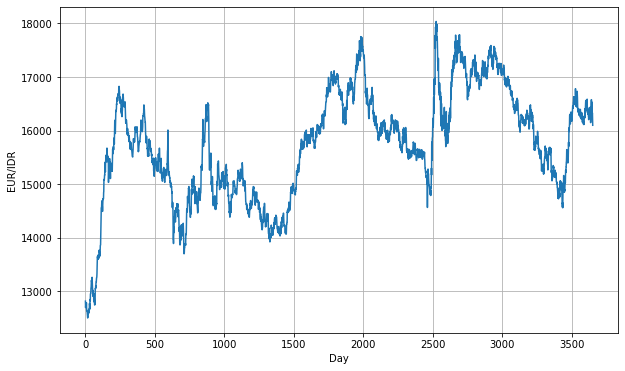

In [44]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./currency_data_10_years.csv') as csvfile:
  
    # Initialize reader
    reader = csv.reader(csvfile, delimiter=',')

    # Skip the first line
    next(reader)

    # Append row and sunspot number to lists
    for i,row in enumerate(reader):
        time_step.append(int(i))
        sunspots.append(float(row[1]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

# Preview the data
plot_series(time, series, xlabel='Day', ylabel='EUR/IDR')

In [36]:
split_time = 3000

x_train = series[:split_time]
time_train = time[:split_time]

x_valid = series[split_time:]
time_valid = time[split_time:]

window_size = 365
batch_size = 128
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [75]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_1")

# Get initial weights
init_weights = model_1.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_1.set_weights(init_weights)

model_1.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_1.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_1 = model_1.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_1.name)])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                10980     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     13/Unknown - 2s 74ms/step - loss: 4011.5598 - mae: 4012.0598

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 6s 227ms/step - loss: 3091.7576 - mae: 3092.2576 - val_loss: 847.1363 - val_mae: 847.6363
Epoch 2/100
13/21 [=================>............] - ETA: 0s - loss: 687.5497 - mae: 688.0497

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 101ms/step - loss: 604.1249 - mae: 604.6249 - val_loss: 526.4427 - val_mae: 526.9427
Epoch 3/100
21/21 [==============================] - 2s 54ms/step - loss: 518.2392 - mae: 518.7391 - val_loss: 814.0417 - val_mae: 814.5417
Epoch 4/100
21/21 [==============================] - 2s 50ms/step - loss: 422.2545 - mae: 422.7540 - val_loss: 593.0410 - val_mae: 593.5410
Epoch 5/100
21/21 [==============================] - 2s 49ms/step - loss: 440.0069 - mae: 440.5066 - val_loss: 584.4939 - val_mae: 584.9939
Epoch 6/100
13/21 [=================>............] - ETA: 0s - loss: 398.0005 - mae: 398.5005

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 95ms/step - loss: 391.5225 - mae: 392.0223 - val_loss: 475.2943 - val_mae: 475.7943
Epoch 7/100
21/21 [==============================] - 2s 51ms/step - loss: 400.6951 - mae: 401.1945 - val_loss: 624.8993 - val_mae: 625.3993
Epoch 8/100
13/21 [=================>............] - ETA: 0s - loss: 377.7832 - mae: 378.2832

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 95ms/step - loss: 410.7310 - mae: 411.2310 - val_loss: 458.3668 - val_mae: 458.8668
Epoch 9/100
21/21 [==============================] - 2s 58ms/step - loss: 511.2105 - mae: 511.7104 - val_loss: 625.5809 - val_mae: 626.0809
Epoch 10/100
21/21 [==============================] - 3s 76ms/step - loss: 372.2192 - mae: 372.7189 - val_loss: 597.6082 - val_mae: 598.1082
Epoch 11/100
15/21 [====================>.........] - ETA: 0s - loss: 371.4447 - mae: 371.9444

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 112ms/step - loss: 363.4760 - mae: 363.9758 - val_loss: 425.8466 - val_mae: 426.3466
Epoch 12/100
21/21 [==============================] - 2s 52ms/step - loss: 380.6531 - mae: 381.1523 - val_loss: 560.6856 - val_mae: 561.1856
Epoch 13/100
13/21 [=================>............] - ETA: 0s - loss: 342.2086 - mae: 342.7081

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 87ms/step - loss: 352.8190 - mae: 353.3187 - val_loss: 393.2185 - val_mae: 393.7185
Epoch 14/100
21/21 [==============================] - 1s 46ms/step - loss: 408.6179 - mae: 409.1176 - val_loss: 522.1946 - val_mae: 522.6943
Epoch 15/100
21/21 [==============================] - 1s 49ms/step - loss: 336.4659 - mae: 336.9656 - val_loss: 432.6880 - val_mae: 433.1880
Epoch 16/100
21/21 [==============================] - 2s 52ms/step - loss: 328.5783 - mae: 329.0780 - val_loss: 476.2145 - val_mae: 476.7145
Epoch 17/100
21/21 [==============================] - 1s 46ms/step - loss: 376.2339 - mae: 376.7336 - val_loss: 655.5454 - val_mae: 656.0454
Epoch 18/100
14/21 [===================>..........] - ETA: 0s - loss: 359.8255 - mae: 360.3253

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 82ms/step - loss: 346.3389 - mae: 346.8383 - val_loss: 312.1913 - val_mae: 312.6913
Epoch 19/100
21/21 [==============================] - 1s 48ms/step - loss: 483.0660 - mae: 483.5659 - val_loss: 402.8433 - val_mae: 403.3433
Epoch 20/100
21/21 [==============================] - 1s 49ms/step - loss: 466.0146 - mae: 466.5145 - val_loss: 359.7442 - val_mae: 360.2426
Epoch 21/100
21/21 [==============================] - 2s 52ms/step - loss: 414.8280 - mae: 415.3277 - val_loss: 445.3159 - val_mae: 445.8149
Epoch 22/100
21/21 [==============================] - 2s 48ms/step - loss: 316.7414 - mae: 317.2409 - val_loss: 322.1129 - val_mae: 322.6128
Epoch 23/100
21/21 [==============================] - 1s 47ms/step - loss: 291.2832 - mae: 291.7826 - val_loss: 374.0026 - val_mae: 374.5026
Epoch 24/100
21/21 [==============================] - 1s 50ms/step - loss: 297.7924 - mae: 298.2922 - val_loss: 424.0326 - val_mae: 424.5326
Epoch 25/100
21/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 84ms/step - loss: 425.8444 - mae: 426.3440 - val_loss: 283.6975 - val_mae: 284.1975
Epoch 29/100
21/21 [==============================] - 1s 46ms/step - loss: 421.7835 - mae: 422.2832 - val_loss: 345.0300 - val_mae: 345.5296
Epoch 30/100
21/21 [==============================] - 1s 48ms/step - loss: 439.5707 - mae: 440.0707 - val_loss: 392.3963 - val_mae: 392.8963
Epoch 31/100
21/21 [==============================] - 2s 53ms/step - loss: 463.7350 - mae: 464.2346 - val_loss: 304.8640 - val_mae: 305.3625
Epoch 32/100
21/21 [==============================] - 2s 53ms/step - loss: 342.4630 - mae: 342.9626 - val_loss: 326.7214 - val_mae: 327.2214
Epoch 33/100
13/21 [=================>............] - ETA: 0s - loss: 280.5359 - mae: 281.0357

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 85ms/step - loss: 278.2273 - mae: 278.7271 - val_loss: 272.7325 - val_mae: 273.2325
Epoch 34/100
21/21 [==============================] - 1s 43ms/step - loss: 286.7773 - mae: 287.2772 - val_loss: 367.5045 - val_mae: 368.0042
Epoch 35/100
21/21 [==============================] - 1s 42ms/step - loss: 304.4709 - mae: 304.9705 - val_loss: 295.9041 - val_mae: 296.4041
Epoch 36/100
21/21 [==============================] - 2s 62ms/step - loss: 280.5208 - mae: 281.0205 - val_loss: 281.5399 - val_mae: 282.0398
Epoch 37/100
15/21 [====================>.........] - ETA: 0s - loss: 263.7079 - mae: 264.2077

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 102ms/step - loss: 255.7861 - mae: 256.2858 - val_loss: 258.5860 - val_mae: 259.0860
Epoch 38/100
15/21 [====================>.........] - ETA: 0s - loss: 262.6901 - mae: 263.1897

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 100ms/step - loss: 272.4359 - mae: 272.9355 - val_loss: 256.2233 - val_mae: 256.7233
Epoch 39/100
21/21 [==============================] - 2s 61ms/step - loss: 299.3831 - mae: 299.8829 - val_loss: 259.5307 - val_mae: 260.0302
Epoch 40/100
21/21 [==============================] - 2s 50ms/step - loss: 318.1863 - mae: 318.6855 - val_loss: 367.3500 - val_mae: 367.8500
Epoch 41/100
21/21 [==============================] - 2s 46ms/step - loss: 324.2149 - mae: 324.7146 - val_loss: 308.9981 - val_mae: 309.4981
Epoch 42/100
21/21 [==============================] - 1s 46ms/step - loss: 374.6547 - mae: 375.1547 - val_loss: 267.4659 - val_mae: 267.9659
Epoch 43/100
21/21 [==============================] - 2s 53ms/step - loss: 266.1731 - mae: 266.6725 - val_loss: 258.3716 - val_mae: 258.8716
Epoch 44/100
21/21 [==============================] - 2s 63ms/step - loss: 273.7477 - mae: 274.2475 - val_loss: 278.8246 - val_mae: 279.3246
Epoch 45/100
21/21 [=====

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 93ms/step - loss: 340.4671 - mae: 340.9668 - val_loss: 246.2555 - val_mae: 246.7550
Epoch 50/100
15/21 [====================>.........] - ETA: 0s - loss: 231.5220 - mae: 232.0214

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 84ms/step - loss: 231.3683 - mae: 231.8678 - val_loss: 244.7477 - val_mae: 245.2476
Epoch 51/100
14/21 [===================>..........] - ETA: 0s - loss: 262.2830 - mae: 262.7827

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 78ms/step - loss: 271.3122 - mae: 271.8119 - val_loss: 236.4795 - val_mae: 236.9795
Epoch 52/100
21/21 [==============================] - 1s 46ms/step - loss: 418.9622 - mae: 419.4622 - val_loss: 277.1458 - val_mae: 277.6449
Epoch 53/100
21/21 [==============================] - 1s 43ms/step - loss: 393.8032 - mae: 394.3029 - val_loss: 374.7169 - val_mae: 375.2169
Epoch 54/100
21/21 [==============================] - 2s 56ms/step - loss: 376.8894 - mae: 377.3890 - val_loss: 437.9914 - val_mae: 438.4914
Epoch 55/100
21/21 [==============================] - 2s 58ms/step - loss: 286.7669 - mae: 287.2668 - val_loss: 289.0555 - val_mae: 289.5555
Epoch 56/100
13/21 [=================>............] - ETA: 0s - loss: 309.0798 - mae: 309.5795

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 92ms/step - loss: 286.0004 - mae: 286.5000 - val_loss: 231.3684 - val_mae: 231.8684
Epoch 57/100
21/21 [==============================] - 2s 57ms/step - loss: 251.0111 - mae: 251.5109 - val_loss: 239.9209 - val_mae: 240.4194
Epoch 58/100
21/21 [==============================] - 2s 47ms/step - loss: 264.4148 - mae: 264.9142 - val_loss: 309.3248 - val_mae: 309.8247
Epoch 59/100
21/21 [==============================] - 2s 55ms/step - loss: 265.9993 - mae: 266.4984 - val_loss: 233.8927 - val_mae: 234.3927
Epoch 60/100
17/21 [=======================>......] - ETA: 0s - loss: 255.3192 - mae: 255.8190

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 92ms/step - loss: 253.4317 - mae: 253.9315 - val_loss: 228.0424 - val_mae: 228.5421
Epoch 61/100
21/21 [==============================] - 2s 51ms/step - loss: 320.3914 - mae: 320.8911 - val_loss: 316.0293 - val_mae: 316.5293
Epoch 62/100
21/21 [==============================] - 1s 44ms/step - loss: 380.7709 - mae: 381.2708 - val_loss: 403.3376 - val_mae: 403.8376
Epoch 63/100
21/21 [==============================] - 1s 42ms/step - loss: 383.6998 - mae: 384.1996 - val_loss: 265.7204 - val_mae: 266.2190
Epoch 64/100
21/21 [==============================] - 1s 41ms/step - loss: 388.2151 - mae: 388.7149 - val_loss: 377.3565 - val_mae: 377.8565
Epoch 65/100
21/21 [==============================] - 1s 48ms/step - loss: 364.7414 - mae: 365.2410 - val_loss: 370.9257 - val_mae: 371.4257
Epoch 66/100
21/21 [==============================] - 2s 55ms/step - loss: 360.5281 - mae: 361.0276 - val_loss: 349.2385 - val_mae: 349.7383
Epoch 67/100
21/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 89ms/step - loss: 248.5349 - mae: 249.0345 - val_loss: 226.9926 - val_mae: 227.4926
Epoch 70/100
21/21 [==============================] - 2s 48ms/step - loss: 241.0604 - mae: 241.5603 - val_loss: 231.9977 - val_mae: 232.4977
Epoch 71/100
21/21 [==============================] - 2s 52ms/step - loss: 289.8298 - mae: 290.3291 - val_loss: 415.5212 - val_mae: 416.0212
Epoch 72/100
21/21 [==============================] - 2s 59ms/step - loss: 232.9650 - mae: 233.4640 - val_loss: 242.9264 - val_mae: 243.4264
Epoch 73/100
21/21 [==============================] - 2s 48ms/step - loss: 234.7687 - mae: 235.2683 - val_loss: 234.5065 - val_mae: 235.0050
Epoch 74/100
13/21 [=================>............] - ETA: 0s - loss: 280.7159 - mae: 281.2153

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 90ms/step - loss: 267.1550 - mae: 267.6546 - val_loss: 225.2910 - val_mae: 225.7910
Epoch 75/100
21/21 [==============================] - 2s 54ms/step - loss: 315.1924 - mae: 315.6918 - val_loss: 361.3514 - val_mae: 361.8514
Epoch 76/100
13/21 [=================>............] - ETA: 0s - loss: 282.0250 - mae: 282.5246

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 99ms/step - loss: 258.8125 - mae: 259.3122 - val_loss: 218.0120 - val_mae: 218.5120
Epoch 77/100
13/21 [=================>............] - ETA: 0s - loss: 228.5340 - mae: 229.0336

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 112ms/step - loss: 227.1057 - mae: 227.6055 - val_loss: 214.4399 - val_mae: 214.9391
Epoch 78/100
21/21 [==============================] - 2s 56ms/step - loss: 228.9667 - mae: 229.4665 - val_loss: 218.4980 - val_mae: 218.9973
Epoch 79/100
21/21 [==============================] - 2s 54ms/step - loss: 221.2234 - mae: 221.7231 - val_loss: 223.2819 - val_mae: 223.7819
Epoch 80/100
21/21 [==============================] - 2s 54ms/step - loss: 256.2216 - mae: 256.7209 - val_loss: 228.4040 - val_mae: 228.9040
Epoch 81/100
13/21 [=================>............] - ETA: 0s - loss: 232.4892 - mae: 232.9887

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 98ms/step - loss: 227.3155 - mae: 227.8152 - val_loss: 209.7111 - val_mae: 210.2111
Epoch 82/100
21/21 [==============================] - 2s 50ms/step - loss: 221.2233 - mae: 221.7231 - val_loss: 237.8383 - val_mae: 238.3383
Epoch 83/100
21/21 [==============================] - 1s 45ms/step - loss: 214.9999 - mae: 215.4995 - val_loss: 252.7250 - val_mae: 253.2250
Epoch 84/100
21/21 [==============================] - 1s 48ms/step - loss: 286.8904 - mae: 287.3903 - val_loss: 527.7335 - val_mae: 528.2335
Epoch 85/100
21/21 [==============================] - 2s 60ms/step - loss: 284.3381 - mae: 284.8374 - val_loss: 262.0512 - val_mae: 262.5498
Epoch 86/100
21/21 [==============================] - 2s 51ms/step - loss: 254.8344 - mae: 255.3339 - val_loss: 221.6183 - val_mae: 222.1178
Epoch 87/100
13/21 [=================>............] - ETA: 0s - loss: 245.9555 - mae: 246.4552

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 3s 106ms/step - loss: 235.8623 - mae: 236.3617 - val_loss: 208.5759 - val_mae: 209.0759
Epoch 88/100
21/21 [==============================] - 2s 50ms/step - loss: 211.9448 - mae: 212.4445 - val_loss: 222.1192 - val_mae: 222.6185
Epoch 89/100
13/21 [=================>............] - ETA: 0s - loss: 214.8252 - mae: 215.3250

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 88ms/step - loss: 225.6083 - mae: 226.1077 - val_loss: 205.1173 - val_mae: 205.6173
Epoch 90/100
21/21 [==============================] - 2s 47ms/step - loss: 226.6339 - mae: 227.1331 - val_loss: 242.2121 - val_mae: 242.7121
Epoch 91/100
21/21 [==============================] - 2s 47ms/step - loss: 263.4864 - mae: 263.9862 - val_loss: 387.8670 - val_mae: 388.3670
Epoch 92/100
21/21 [==============================] - 2s 47ms/step - loss: 412.2206 - mae: 412.7206 - val_loss: 298.3974 - val_mae: 298.8974
Epoch 93/100
21/21 [==============================] - 2s 47ms/step - loss: 316.1516 - mae: 316.6515 - val_loss: 213.9527 - val_mae: 214.4523
Epoch 94/100
19/21 [==========================>...] - ETA: 0s - loss: 243.8503 - mae: 244.3499

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 85ms/step - loss: 246.4781 - mae: 246.9776 - val_loss: 204.0217 - val_mae: 204.5217
Epoch 95/100
21/21 [==============================] - 1s 47ms/step - loss: 351.1389 - mae: 351.6387 - val_loss: 313.2780 - val_mae: 313.7780
Epoch 96/100
21/21 [==============================] - 1s 47ms/step - loss: 340.7739 - mae: 341.2739 - val_loss: 608.5836 - val_mae: 609.0836
Epoch 97/100
21/21 [==============================] - 1s 46ms/step - loss: 386.5985 - mae: 387.0982 - val_loss: 403.6258 - val_mae: 404.1258
Epoch 98/100
21/21 [==============================] - 1s 46ms/step - loss: 250.4069 - mae: 250.9064 - val_loss: 208.1785 - val_mae: 208.6785
Epoch 99/100
13/21 [=================>............] - ETA: 0s - loss: 214.4295 - mae: 214.9293

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


21/21 [==============================] - 2s 85ms/step - loss: 222.5555 - mae: 223.0550 - val_loss: 200.0132 - val_mae: 200.5120
Epoch 100/100
21/21 [==============================] - 1s 46ms/step - loss: 335.6523 - mae: 336.1519 - val_loss: 490.3432 - val_mae: 490.8432


3/3 [==============================] - 0s 26ms/step - loss: 200.0133 - mae: 200.5121


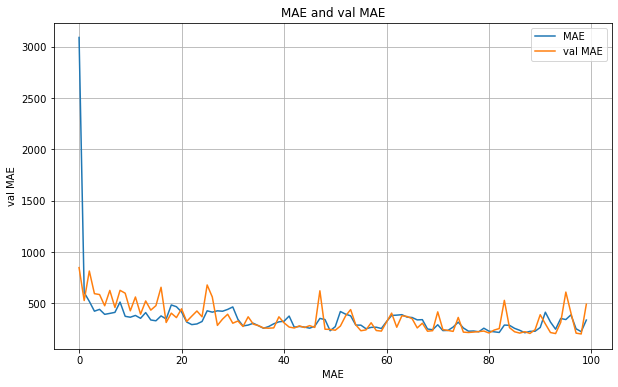

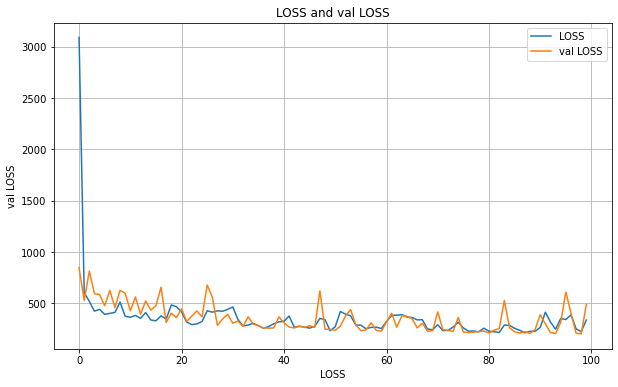

6/6 [==============================] - 0s 60ms/step


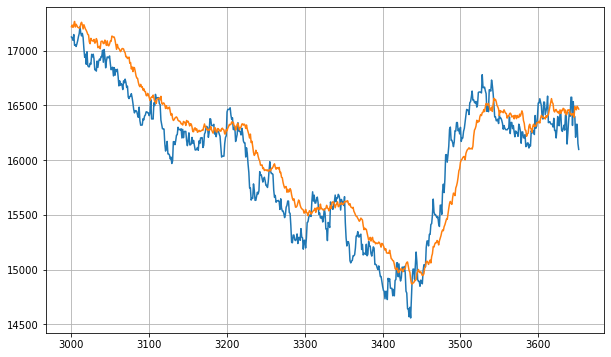

{'mae': 192.0101,
 'mse': 54630.703,
 'rmse': 233.73212,
 'mape': 1.2052714,
 'mase': 3.710221}

In [76]:
# Load in best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1/")
model_1.evaluate(valid_set)

# Get mae and loss from history log
mae=history_1.history['mae']
val_mae=history_1.history['val_mae']
loss=history_1.history['loss']
val_loss=history_1.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_1, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_1 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_1))

eval_model_1 = evaluate_preds(y_true=x_valid,
                               y_pred=results_1)
eval_model_1

In [65]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_2")

# Get initial weights
init_weights = model_2.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_2.set_weights(init_weights)

model_2.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_2.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_2 = model_2.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_2.name)])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               46848     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,009
Trainable params: 51,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     13/Unknown - 2s 59ms/step - loss: 10335.6182 - mae: 10336.1182

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 3s 93ms/step - loss: 7847.6318 - mae: 7848.1313 - val_loss: 2820.2913 - val_mae: 2820.7913
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 1178.8480 - mae: 1179.3477

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 81ms/step - loss: 1168.6451 - mae: 1169.1448 - val_loss: 846.7916 - val_mae: 847.2896
Epoch 3/100
13/21 [=================>............] - ETA: 0s - loss: 1214.6012 - mae: 1215.1008

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 94ms/step - loss: 1131.4973 - mae: 1131.9972 - val_loss: 768.9522 - val_mae: 769.4522
Epoch 4/100
13/21 [=================>............] - ETA: 0s - loss: 863.8715 - mae: 864.3713

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 82ms/step - loss: 823.5770 - mae: 824.0765 - val_loss: 689.4031 - val_mae: 689.9031
Epoch 5/100
21/21 [==============================] - 1s 44ms/step - loss: 901.2070 - mae: 901.7069 - val_loss: 731.3684 - val_mae: 731.8684
Epoch 6/100
21/21 [==============================] - 1s 44ms/step - loss: 785.7836 - mae: 786.2836 - val_loss: 725.2087 - val_mae: 725.7087
Epoch 7/100
19/21 [==========================>...] - ETA: 0s - loss: 572.2932 - mae: 572.7930

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 81ms/step - loss: 570.4266 - mae: 570.9265 - val_loss: 511.0394 - val_mae: 511.5388
Epoch 8/100
20/21 [===========================>..] - ETA: 0s - loss: 523.6155 - mae: 524.1155

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 82ms/step - loss: 522.7580 - mae: 523.2580 - val_loss: 485.2355 - val_mae: 485.7355
Epoch 9/100
21/21 [==============================] - 1s 43ms/step - loss: 660.4732 - mae: 660.9729 - val_loss: 1730.7917 - val_mae: 1731.2917
Epoch 10/100
21/21 [==============================] - 1s 44ms/step - loss: 1280.8635 - mae: 1281.3635 - val_loss: 1041.3884 - val_mae: 1041.8884
Epoch 11/100
21/21 [==============================] - 1s 43ms/step - loss: 545.3982 - mae: 545.8982 - val_loss: 879.1521 - val_mae: 879.6519
Epoch 12/100
21/21 [==============================] - 1s 45ms/step - loss: 679.5776 - mae: 680.0776 - val_loss: 659.4538 - val_mae: 659.9534
Epoch 13/100
21/21 [==============================] - 1s 44ms/step - loss: 687.9682 - mae: 688.4682 - val_loss: 755.2487 - val_mae: 755.7487
Epoch 14/100
13/21 [=================>............] - ETA: 0s - loss: 630.7356 - mae: 631.2356

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 82ms/step - loss: 693.7460 - mae: 694.2460 - val_loss: 482.6947 - val_mae: 483.1947
Epoch 15/100
20/21 [===========================>..] - ETA: 0s - loss: 409.9273 - mae: 410.4265

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 81ms/step - loss: 408.1745 - mae: 408.6736 - val_loss: 396.6744 - val_mae: 397.1744
Epoch 16/100
13/21 [=================>............] - ETA: 0s - loss: 384.5037 - mae: 385.0031

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 82ms/step - loss: 399.5733 - mae: 400.0728 - val_loss: 373.9862 - val_mae: 374.4862
Epoch 17/100
21/21 [==============================] - 1s 43ms/step - loss: 663.2676 - mae: 663.7675 - val_loss: 388.0941 - val_mae: 388.5941
Epoch 18/100
21/21 [==============================] - 1s 44ms/step - loss: 374.0633 - mae: 374.5628 - val_loss: 420.4291 - val_mae: 420.9291
Epoch 19/100
21/21 [==============================] - 1s 44ms/step - loss: 427.9554 - mae: 428.4552 - val_loss: 387.6874 - val_mae: 388.1872
Epoch 20/100
21/21 [==============================] - 1s 43ms/step - loss: 398.6203 - mae: 399.1200 - val_loss: 594.3870 - val_mae: 594.8870
Epoch 21/100
13/21 [=================>............] - ETA: 0s - loss: 458.6575 - mae: 459.1573

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 82ms/step - loss: 633.8365 - mae: 634.3361 - val_loss: 336.5477 - val_mae: 337.0477
Epoch 22/100
21/21 [==============================] - 1s 44ms/step - loss: 1302.2169 - mae: 1302.7169 - val_loss: 668.4866 - val_mae: 668.9866
Epoch 23/100
21/21 [==============================] - 1s 44ms/step - loss: 1118.2783 - mae: 1118.7782 - val_loss: 602.0173 - val_mae: 602.5173
Epoch 24/100
21/21 [==============================] - 1s 45ms/step - loss: 636.3729 - mae: 636.8728 - val_loss: 647.8293 - val_mae: 648.3293
Epoch 25/100
21/21 [==============================] - 1s 45ms/step - loss: 533.8003 - mae: 534.2999 - val_loss: 475.1103 - val_mae: 475.6103
Epoch 26/100
21/21 [==============================] - 1s 43ms/step - loss: 488.0607 - mae: 488.5604 - val_loss: 419.6067 - val_mae: 420.1067
Epoch 27/100
21/21 [==============================] - 1s 44ms/step - loss: 509.1163 - mae: 509.6160 - val_loss: 640.9783 - val_mae: 641.4783
Epoch 28/100
21/21 [==

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 79ms/step - loss: 370.2604 - mae: 370.7601 - val_loss: 329.5963 - val_mae: 330.0962
Epoch 33/100
13/21 [=================>............] - ETA: 0s - loss: 324.5768 - mae: 325.0757

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 91ms/step - loss: 335.8242 - mae: 336.3235 - val_loss: 325.9626 - val_mae: 326.4626
Epoch 34/100
13/21 [=================>............] - ETA: 0s - loss: 346.8637 - mae: 347.3632

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 83ms/step - loss: 366.3799 - mae: 366.8795 - val_loss: 310.8391 - val_mae: 311.3391
Epoch 35/100
21/21 [==============================] - 1s 43ms/step - loss: 549.2339 - mae: 549.7339 - val_loss: 311.2173 - val_mae: 311.7169
Epoch 36/100
21/21 [==============================] - 1s 44ms/step - loss: 532.4922 - mae: 532.9921 - val_loss: 621.1378 - val_mae: 621.6365
Epoch 37/100
21/21 [==============================] - 1s 43ms/step - loss: 396.5412 - mae: 397.0411 - val_loss: 362.7355 - val_mae: 363.2339
Epoch 38/100
21/21 [==============================] - 1s 43ms/step - loss: 359.4330 - mae: 359.9326 - val_loss: 317.6301 - val_mae: 318.1301
Epoch 39/100
21/21 [==============================] - 1s 43ms/step - loss: 299.6458 - mae: 300.1454 - val_loss: 345.6855 - val_mae: 346.1853
Epoch 40/100
13/21 [=================>............] - ETA: 0s - loss: 301.9763 - mae: 302.4758

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 82ms/step - loss: 302.6028 - mae: 303.1023 - val_loss: 282.7108 - val_mae: 283.2108
Epoch 41/100
15/21 [====================>.........] - ETA: 0s - loss: 314.7373 - mae: 315.2363

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 80ms/step - loss: 319.6421 - mae: 320.1411 - val_loss: 279.3523 - val_mae: 279.8518
Epoch 42/100
21/21 [==============================] - 1s 43ms/step - loss: 305.0517 - mae: 305.5507 - val_loss: 281.1337 - val_mae: 281.6337
Epoch 43/100
21/21 [==============================] - 1s 44ms/step - loss: 273.9732 - mae: 274.4729 - val_loss: 337.0006 - val_mae: 337.5006
Epoch 44/100
21/21 [==============================] - 1s 43ms/step - loss: 533.4518 - mae: 533.9515 - val_loss: 407.2541 - val_mae: 407.7541
Epoch 45/100
21/21 [==============================] - 1s 44ms/step - loss: 384.8328 - mae: 385.3323 - val_loss: 418.8395 - val_mae: 419.3395
Epoch 46/100
21/21 [==============================] - 1s 44ms/step - loss: 513.2856 - mae: 513.7853 - val_loss: 645.8614 - val_mae: 646.3614
Epoch 47/100
21/21 [==============================] - 1s 43ms/step - loss: 464.1153 - mae: 464.6152 - val_loss: 341.5788 - val_mae: 342.0788
Epoch 48/100
21/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 80ms/step - loss: 312.1307 - mae: 312.6301 - val_loss: 271.1396 - val_mae: 271.6396
Epoch 59/100
21/21 [==============================] - 2s 57ms/step - loss: 287.8093 - mae: 288.3090 - val_loss: 414.1505 - val_mae: 414.6505
Epoch 60/100
21/21 [==============================] - 1s 49ms/step - loss: 362.6670 - mae: 363.1669 - val_loss: 530.8835 - val_mae: 531.3835
Epoch 61/100
21/21 [==============================] - 2s 56ms/step - loss: 359.2476 - mae: 359.7476 - val_loss: 342.8108 - val_mae: 343.3107
Epoch 62/100
13/21 [=================>............] - ETA: 0s - loss: 246.6804 - mae: 247.1800

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 83ms/step - loss: 274.5981 - mae: 275.0977 - val_loss: 259.7304 - val_mae: 260.2292
Epoch 63/100
21/21 [==============================] - 2s 53ms/step - loss: 448.8934 - mae: 449.3932 - val_loss: 700.8366 - val_mae: 701.3366
Epoch 64/100
21/21 [==============================] - 1s 43ms/step - loss: 418.0891 - mae: 418.5885 - val_loss: 456.0875 - val_mae: 456.5875
Epoch 65/100
21/21 [==============================] - 1s 44ms/step - loss: 261.2218 - mae: 261.7214 - val_loss: 452.9424 - val_mae: 453.4424
Epoch 66/100
21/21 [==============================] - 1s 44ms/step - loss: 272.1940 - mae: 272.6937 - val_loss: 294.1358 - val_mae: 294.6358
Epoch 67/100
21/21 [==============================] - 1s 43ms/step - loss: 252.6279 - mae: 253.1275 - val_loss: 291.4411 - val_mae: 291.9380
Epoch 68/100
21/21 [==============================] - 1s 44ms/step - loss: 355.9833 - mae: 356.4829 - val_loss: 531.9615 - val_mae: 532.4615
Epoch 69/100
14/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 82ms/step - loss: 384.5681 - mae: 385.0677 - val_loss: 251.6431 - val_mae: 252.1429
Epoch 70/100
21/21 [==============================] - 1s 43ms/step - loss: 377.4009 - mae: 377.9004 - val_loss: 606.5016 - val_mae: 607.0016
Epoch 71/100
21/21 [==============================] - 1s 43ms/step - loss: 385.2369 - mae: 385.7368 - val_loss: 563.6482 - val_mae: 564.1482
Epoch 72/100
21/21 [==============================] - 1s 43ms/step - loss: 365.1520 - mae: 365.6516 - val_loss: 380.8512 - val_mae: 381.3512
Epoch 73/100
21/21 [==============================] - 1s 43ms/step - loss: 349.7573 - mae: 350.2570 - val_loss: 254.1715 - val_mae: 254.6698
Epoch 74/100
21/21 [==============================] - 1s 45ms/step - loss: 270.7574 - mae: 271.2573 - val_loss: 258.6905 - val_mae: 259.1905
Epoch 75/100
21/21 [==============================] - 1s 43ms/step - loss: 256.8104 - mae: 257.3098 - val_loss: 279.1648 - val_mae: 279.6648
Epoch 76/100
21/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 81ms/step - loss: 325.3970 - mae: 325.8969 - val_loss: 232.7846 - val_mae: 233.2830
Epoch 79/100
21/21 [==============================] - 1s 44ms/step - loss: 420.3218 - mae: 420.8217 - val_loss: 397.7234 - val_mae: 398.2234
Epoch 80/100
21/21 [==============================] - 1s 45ms/step - loss: 431.8891 - mae: 432.3888 - val_loss: 424.1424 - val_mae: 424.6411
Epoch 81/100
21/21 [==============================] - 1s 45ms/step - loss: 277.9763 - mae: 278.4760 - val_loss: 284.1778 - val_mae: 284.6776
Epoch 82/100
21/21 [==============================] - 1s 44ms/step - loss: 266.2900 - mae: 266.7895 - val_loss: 318.6466 - val_mae: 319.1466
Epoch 83/100
13/21 [=================>............] - ETA: 0s - loss: 242.8990 - mae: 243.3987

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 81ms/step - loss: 234.4047 - mae: 234.9045 - val_loss: 232.0092 - val_mae: 232.5092
Epoch 84/100
21/21 [==============================] - 1s 44ms/step - loss: 254.0912 - mae: 254.5908 - val_loss: 265.8258 - val_mae: 266.3252
Epoch 85/100
21/21 [==============================] - 1s 44ms/step - loss: 249.8617 - mae: 250.3612 - val_loss: 234.4156 - val_mae: 234.9155
Epoch 86/100
21/21 [==============================] - 2s 76ms/step - loss: 245.4210 - mae: 245.9206 - val_loss: 693.1343 - val_mae: 693.6343
Epoch 87/100
21/21 [==============================] - 2s 79ms/step - loss: 419.8152 - mae: 420.3152 - val_loss: 439.1335 - val_mae: 439.6320
Epoch 88/100
13/21 [=================>............] - ETA: 0s - loss: 310.1721 - mae: 310.6714

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 91ms/step - loss: 284.3461 - mae: 284.8457 - val_loss: 229.1658 - val_mae: 229.6657
Epoch 89/100
21/21 [==============================] - 1s 44ms/step - loss: 246.8142 - mae: 247.3141 - val_loss: 231.7811 - val_mae: 232.2808
Epoch 90/100
21/21 [==============================] - 1s 43ms/step - loss: 360.6397 - mae: 361.1396 - val_loss: 429.1627 - val_mae: 429.6627
Epoch 91/100
21/21 [==============================] - 1s 43ms/step - loss: 277.2922 - mae: 277.7918 - val_loss: 232.9462 - val_mae: 233.4462
Epoch 92/100
21/21 [==============================] - 1s 43ms/step - loss: 230.7853 - mae: 231.2849 - val_loss: 263.8440 - val_mae: 264.3440
Epoch 93/100
21/21 [==============================] - 1s 44ms/step - loss: 331.8738 - mae: 332.3734 - val_loss: 301.0754 - val_mae: 301.5737
Epoch 94/100
14/21 [===================>..........] - ETA: 0s - loss: 230.2490 - mae: 230.7485

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 81ms/step - loss: 234.1268 - mae: 234.6261 - val_loss: 228.3825 - val_mae: 228.8825
Epoch 95/100
15/21 [====================>.........] - ETA: 0s - loss: 291.7640 - mae: 292.2638

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 80ms/step - loss: 288.3859 - mae: 288.8857 - val_loss: 225.5148 - val_mae: 226.0148
Epoch 96/100
21/21 [==============================] - 1s 43ms/step - loss: 242.4669 - mae: 242.9666 - val_loss: 392.7570 - val_mae: 393.2570
Epoch 97/100
14/21 [===================>..........] - ETA: 0s - loss: 221.5799 - mae: 222.0786

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


21/21 [==============================] - 2s 86ms/step - loss: 220.3724 - mae: 220.8714 - val_loss: 214.7970 - val_mae: 215.2970
Epoch 98/100
21/21 [==============================] - 2s 54ms/step - loss: 210.6332 - mae: 211.1325 - val_loss: 268.2953 - val_mae: 268.7947
Epoch 99/100
21/21 [==============================] - 1s 41ms/step - loss: 246.5321 - mae: 247.0320 - val_loss: 262.6981 - val_mae: 263.1980
Epoch 100/100
21/21 [==============================] - 1s 40ms/step - loss: 230.5280 - mae: 231.0276 - val_loss: 216.6202 - val_mae: 217.1181


3/3 [==============================] - 0s 19ms/step - loss: 214.7970 - mae: 215.2970


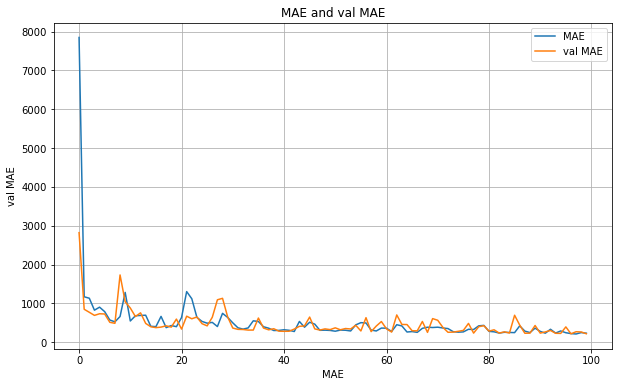

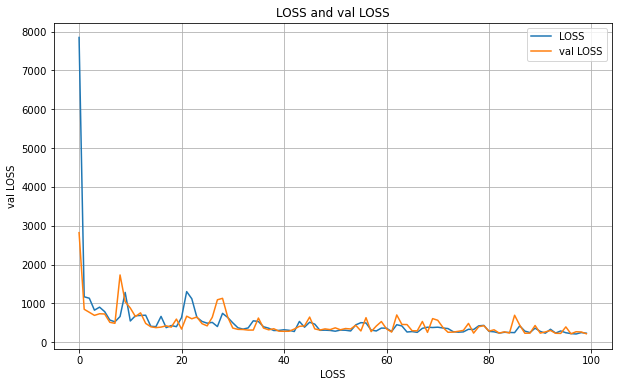

6/6 [==============================] - 0s 64ms/step


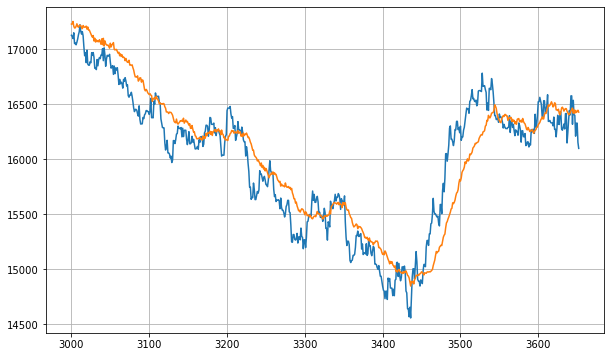

{'mae': 187.5338,
 'mse': 56772.355,
 'rmse': 238.2695,
 'mape': 1.1739699,
 'mase': 3.6237254}

In [68]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(valid_set)

# Get mae and loss from history log
mae=history_2.history['mae']
val_mae=history_2.history['val_mae']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_2 = model_forecast(model_2, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_2 = forecast_2.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_2))

eval_model_2 = evaluate_preds(y_true=x_valid,
                               y_pred=results_2)
eval_model_2

In [69]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_3")

# Get initial weights
init_weights = model_3.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_3.set_weights(init_weights)

model_3.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_3.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_3 = model_3.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_3.name)])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,671
Trainable params: 3,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     13/Unknown - 2s 62ms/step - loss: 10167.2354 - mae: 10167.7354WARNING:tensorflow:5 out of the last 310 calls to <function Model.make_test_function.<locals>.test_function at 0x000002485603ECA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 3s 98ms/step - loss: 7847.9712 - mae: 7848.4712 - val_loss: 2962.9426 - val_mae: 2963.4426
Epoch 2/100
13/21 [=================>............] - ETA: 0s - loss: 2474.3015 - mae: 2474.8015

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 3s 95ms/step - loss: 2113.2083 - mae: 2113.7083 - val_loss: 960.2997 - val_mae: 960.7980
Epoch 3/100
21/21 [==============================] - 1s 47ms/step - loss: 1042.7620 - mae: 1043.2618 - val_loss: 1089.4423 - val_mae: 1089.9423
Epoch 4/100
13/21 [=================>............] - ETA: 0s - loss: 908.7839 - mae: 909.2833

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 913.5052 - mae: 914.0048 - val_loss: 872.5961 - val_mae: 873.0961
Epoch 5/100
13/21 [=================>............] - ETA: 0s - loss: 931.7438 - mae: 932.2437

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 77ms/step - loss: 947.1185 - mae: 947.6185 - val_loss: 804.4847 - val_mae: 804.9847
Epoch 6/100
21/21 [==============================] - 1s 47ms/step - loss: 959.7769 - mae: 960.2767 - val_loss: 1141.5642 - val_mae: 1142.0642
Epoch 7/100
21/21 [==============================] - 1s 48ms/step - loss: 936.5538 - mae: 937.0538 - val_loss: 1022.6814 - val_mae: 1023.1814
Epoch 8/100
13/21 [=================>............] - ETA: 0s - loss: 741.0759 - mae: 741.5759

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 794.1317 - mae: 794.6317 - val_loss: 706.4388 - val_mae: 706.9388
Epoch 9/100
21/21 [==============================] - 1s 48ms/step - loss: 824.5691 - mae: 825.0691 - val_loss: 757.8172 - val_mae: 758.3172
Epoch 10/100
21/21 [==============================] - 1s 47ms/step - loss: 788.6624 - mae: 789.1622 - val_loss: 736.2080 - val_mae: 736.7076
Epoch 11/100
13/21 [=================>............] - ETA: 0s - loss: 803.5601 - mae: 804.0601

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 779.6489 - mae: 780.1489 - val_loss: 662.6163 - val_mae: 663.1162
Epoch 12/100
21/21 [==============================] - 1s 45ms/step - loss: 827.1944 - mae: 827.6943 - val_loss: 949.7872 - val_mae: 950.2872
Epoch 13/100
21/21 [==============================] - 1s 47ms/step - loss: 766.7606 - mae: 767.2606 - val_loss: 1082.2516 - val_mae: 1082.7516
Epoch 14/100
13/21 [=================>............] - ETA: 0s - loss: 626.3837 - mae: 626.8837

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 75ms/step - loss: 666.2001 - mae: 666.7001 - val_loss: 595.0984 - val_mae: 595.5975
Epoch 15/100
13/21 [=================>............] - ETA: 0s - loss: 757.0640 - mae: 757.5640

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 745.2111 - mae: 745.7110 - val_loss: 581.6724 - val_mae: 582.1724
Epoch 16/100
21/21 [==============================] - 1s 47ms/step - loss: 708.2722 - mae: 708.7719 - val_loss: 1151.7181 - val_mae: 1152.2181
Epoch 17/100
21/21 [==============================] - 1s 47ms/step - loss: 650.0127 - mae: 650.5125 - val_loss: 864.7604 - val_mae: 865.2604
Epoch 18/100
21/21 [==============================] - 2s 48ms/step - loss: 605.1287 - mae: 605.6284 - val_loss: 690.1072 - val_mae: 690.6072
Epoch 19/100
21/21 [==============================] - 1s 48ms/step - loss: 597.3923 - mae: 597.8922 - val_loss: 719.1155 - val_mae: 719.6155
Epoch 20/100
21/21 [==============================] - 1s 48ms/step - loss: 579.5403 - mae: 580.0402 - val_loss: 658.1829 - val_mae: 658.6829
Epoch 21/100
21/21 [==============================] - 1s 47ms/step - loss: 562.9843 - mae: 563.4841 - val_loss: 1315.6874 - val_mae: 1316.1874
Epoch 22/100
13/21 [==

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 900.5907 - mae: 901.0907 - val_loss: 497.1910 - val_mae: 497.6897
Epoch 23/100
13/21 [=================>............] - ETA: 0s - loss: 566.5419 - mae: 567.0416

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 77ms/step - loss: 570.1578 - mae: 570.6577 - val_loss: 487.4685 - val_mae: 487.9685
Epoch 24/100
21/21 [==============================] - 1s 46ms/step - loss: 576.6452 - mae: 577.1451 - val_loss: 499.5167 - val_mae: 500.0167
Epoch 25/100
21/21 [==============================] - 1s 46ms/step - loss: 626.1411 - mae: 626.6407 - val_loss: 579.7895 - val_mae: 580.2881
Epoch 26/100
21/21 [==============================] - 1s 46ms/step - loss: 535.3599 - mae: 535.8598 - val_loss: 718.8359 - val_mae: 719.3359
Epoch 27/100
21/21 [==============================] - 1s 47ms/step - loss: 741.4906 - mae: 741.9902 - val_loss: 1248.3015 - val_mae: 1248.8015
Epoch 28/100
21/21 [==============================] - 1s 48ms/step - loss: 857.5103 - mae: 858.0103 - val_loss: 618.3032 - val_mae: 618.8032
Epoch 29/100
21/21 [==============================] - 1s 48ms/step - loss: 543.9026 - mae: 544.4025 - val_loss: 514.3566 - val_mae: 514.8566
Epoch 30/100
21/21 [====

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 75ms/step - loss: 464.6083 - mae: 465.1082 - val_loss: 423.6202 - val_mae: 424.1202
Epoch 33/100
21/21 [==============================] - 1s 48ms/step - loss: 518.6894 - mae: 519.1894 - val_loss: 460.1565 - val_mae: 460.6563
Epoch 34/100
21/21 [==============================] - 1s 46ms/step - loss: 519.9438 - mae: 520.4434 - val_loss: 1298.3765 - val_mae: 1298.8765
Epoch 35/100
21/21 [==============================] - 1s 47ms/step - loss: 957.6794 - mae: 958.1794 - val_loss: 1264.3141 - val_mae: 1264.8141
Epoch 36/100
21/21 [==============================] - 1s 47ms/step - loss: 1506.4653 - mae: 1506.9652 - val_loss: 1463.3904 - val_mae: 1463.8904
Epoch 37/100
21/21 [==============================] - 2s 47ms/step - loss: 1049.0142 - mae: 1049.5138 - val_loss: 739.1161 - val_mae: 739.6161
Epoch 38/100
21/21 [==============================] - 1s 44ms/step - loss: 527.9292 - mae: 528.4291 - val_loss: 628.0515 - val_mae: 628.5513
Epoch 39/100
21/

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 684.5859 - mae: 685.0859 - val_loss: 395.2393 - val_mae: 395.7393
Epoch 43/100
21/21 [==============================] - 1s 47ms/step - loss: 404.9426 - mae: 405.4423 - val_loss: 563.7246 - val_mae: 564.2246
Epoch 44/100
21/21 [==============================] - 1s 47ms/step - loss: 814.5569 - mae: 815.0568 - val_loss: 513.5428 - val_mae: 514.0428
Epoch 45/100
21/21 [==============================] - 1s 46ms/step - loss: 807.3053 - mae: 807.8053 - val_loss: 549.7458 - val_mae: 550.2425
Epoch 46/100
21/21 [==============================] - 1s 47ms/step - loss: 467.9250 - mae: 468.4247 - val_loss: 400.6657 - val_mae: 401.1657
Epoch 47/100
21/21 [==============================] - 1s 47ms/step - loss: 518.3182 - mae: 518.8178 - val_loss: 1133.1837 - val_mae: 1133.6837
Epoch 48/100
21/21 [==============================] - 1s 47ms/step - loss: 480.9991 - mae: 481.4987 - val_loss: 492.2556 - val_mae: 492.7542
Epoch 49/100
13/21 [====

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 75ms/step - loss: 390.4916 - mae: 390.9912 - val_loss: 358.6499 - val_mae: 359.1499
Epoch 50/100
21/21 [==============================] - 2s 49ms/step - loss: 443.3494 - mae: 443.8493 - val_loss: 374.1910 - val_mae: 374.6910
Epoch 51/100
21/21 [==============================] - 1s 47ms/step - loss: 369.1563 - mae: 369.6559 - val_loss: 371.2552 - val_mae: 371.7552
Epoch 52/100
21/21 [==============================] - 1s 46ms/step - loss: 409.9836 - mae: 410.4834 - val_loss: 361.7137 - val_mae: 362.2123
Epoch 53/100
21/21 [==============================] - 1s 46ms/step - loss: 601.5051 - mae: 602.0049 - val_loss: 665.0138 - val_mae: 665.5138
Epoch 54/100
21/21 [==============================] - 1s 46ms/step - loss: 804.7440 - mae: 805.2440 - val_loss: 421.1779 - val_mae: 421.6779
Epoch 55/100
21/21 [==============================] - 1s 47ms/step - loss: 851.4731 - mae: 851.9730 - val_loss: 363.3713 - val_mae: 363.8713
Epoch 56/100
21/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 86ms/step - loss: 403.6787 - mae: 404.1785 - val_loss: 347.8962 - val_mae: 348.3961
Epoch 59/100
13/21 [=================>............] - ETA: 0s - loss: 398.4838 - mae: 398.9829

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 399.9471 - mae: 400.4464 - val_loss: 333.9481 - val_mae: 334.4481
Epoch 60/100
21/21 [==============================] - 1s 47ms/step - loss: 356.7350 - mae: 357.2349 - val_loss: 334.2787 - val_mae: 334.7787
Epoch 61/100
21/21 [==============================] - 1s 48ms/step - loss: 884.7865 - mae: 885.2863 - val_loss: 1130.0024 - val_mae: 1130.5024
Epoch 62/100
21/21 [==============================] - 1s 47ms/step - loss: 571.3087 - mae: 571.8086 - val_loss: 481.3884 - val_mae: 481.8871
Epoch 63/100
21/21 [==============================] - 1s 47ms/step - loss: 396.1433 - mae: 396.6423 - val_loss: 335.1459 - val_mae: 335.6459
Epoch 64/100
21/21 [==============================] - 1s 47ms/step - loss: 444.8751 - mae: 445.3747 - val_loss: 1232.2222 - val_mae: 1232.7222
Epoch 65/100
21/21 [==============================] - 1s 47ms/step - loss: 646.5048 - mae: 647.0046 - val_loss: 594.7349 - val_mae: 595.2349
Epoch 66/100
20/21 [==

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 74ms/step - loss: 452.9195 - mae: 453.4193 - val_loss: 314.4164 - val_mae: 314.9164
Epoch 67/100
21/21 [==============================] - 1s 47ms/step - loss: 338.3523 - mae: 338.8519 - val_loss: 405.7396 - val_mae: 406.2384
Epoch 68/100
21/21 [==============================] - 1s 47ms/step - loss: 368.0262 - mae: 368.5259 - val_loss: 410.2085 - val_mae: 410.7085
Epoch 69/100
21/21 [==============================] - 2s 66ms/step - loss: 763.7397 - mae: 764.2397 - val_loss: 982.5752 - val_mae: 983.0752
Epoch 70/100
21/21 [==============================] - 2s 47ms/step - loss: 800.1954 - mae: 800.6954 - val_loss: 1228.3732 - val_mae: 1228.8732
Epoch 71/100
21/21 [==============================] - 1s 47ms/step - loss: 818.9933 - mae: 819.4932 - val_loss: 484.5559 - val_mae: 485.0558
Epoch 72/100
21/21 [==============================] - 1s 48ms/step - loss: 566.3147 - mae: 566.8140 - val_loss: 338.7898 - val_mae: 339.2898
Epoch 73/100
21/21 [====

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 76ms/step - loss: 356.4971 - mae: 356.9967 - val_loss: 298.1742 - val_mae: 298.6742
Epoch 75/100
21/21 [==============================] - 1s 47ms/step - loss: 423.2715 - mae: 423.7715 - val_loss: 303.5157 - val_mae: 304.0157
Epoch 76/100
21/21 [==============================] - 1s 44ms/step - loss: 435.4191 - mae: 435.9191 - val_loss: 317.5369 - val_mae: 318.0358
Epoch 77/100
21/21 [==============================] - 1s 44ms/step - loss: 366.5702 - mae: 367.0699 - val_loss: 424.6357 - val_mae: 425.1350
Epoch 78/100
21/21 [==============================] - 1s 43ms/step - loss: 389.0643 - mae: 389.5639 - val_loss: 463.5138 - val_mae: 464.0128
Epoch 79/100
21/21 [==============================] - 1s 44ms/step - loss: 414.1479 - mae: 414.6475 - val_loss: 539.7754 - val_mae: 540.2739
Epoch 80/100
13/21 [=================>............] - ETA: 0s - loss: 416.7086 - mae: 417.2085

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


21/21 [==============================] - 2s 75ms/step - loss: 538.8736 - mae: 539.3734 - val_loss: 286.8717 - val_mae: 287.3714
Epoch 81/100
21/21 [==============================] - 1s 44ms/step - loss: 615.8676 - mae: 616.3672 - val_loss: 298.9927 - val_mae: 299.4927
Epoch 82/100
21/21 [==============================] - 1s 44ms/step - loss: 363.2504 - mae: 363.7499 - val_loss: 341.4068 - val_mae: 341.9068
Epoch 83/100
21/21 [==============================] - 1s 43ms/step - loss: 391.4312 - mae: 391.9309 - val_loss: 292.8164 - val_mae: 293.3163
Epoch 84/100
21/21 [==============================] - 1s 44ms/step - loss: 418.8447 - mae: 419.3443 - val_loss: 307.1361 - val_mae: 307.6352
Epoch 85/100
21/21 [==============================] - 1s 44ms/step - loss: 412.1577 - mae: 412.6575 - val_loss: 882.4592 - val_mae: 882.9592
Epoch 86/100
21/21 [==============================] - 1s 43ms/step - loss: 771.8904 - mae: 772.3904 - val_loss: 681.1074 - val_mae: 681.6074
Epoch 87/100
21/21 [======

3/3 [==============================] - 0s 21ms/step - loss: 286.8717 - mae: 287.3714


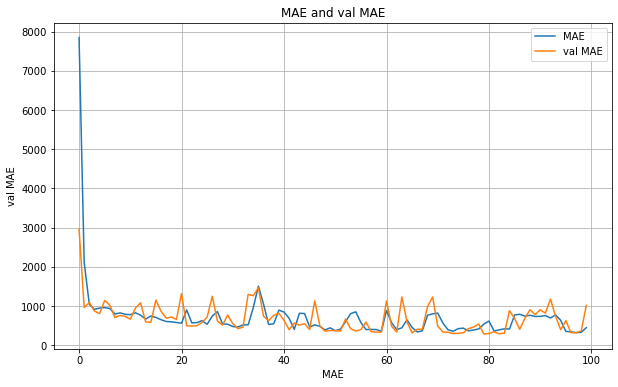

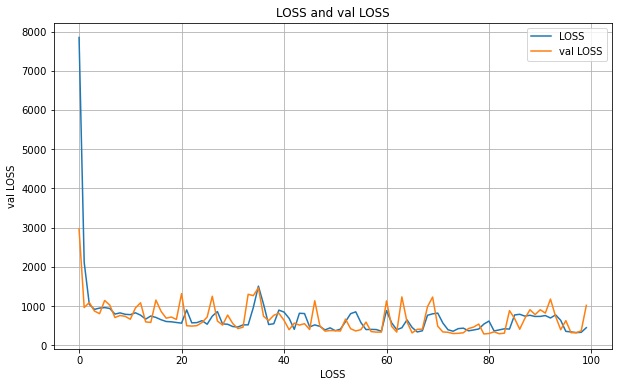

6/6 [==============================] - 0s 56ms/step


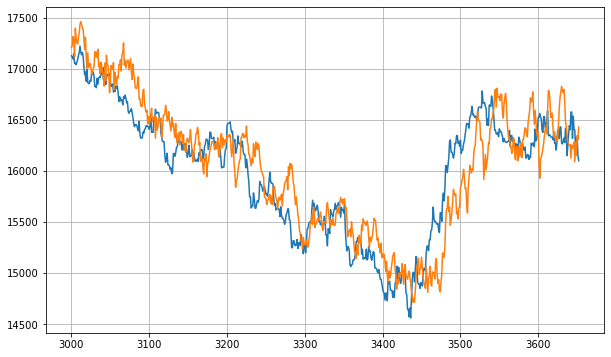

{'mae': 239.76364,
 'mse': 88697.125,
 'rmse': 297.82062,
 'mape': 1.500304,
 'mase': 4.632965}

In [70]:
# Load in best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3/")
model_3.evaluate(valid_set)

# Get mae and loss from history log
mae=history_3.history['mae']
val_mae=history_3.history['val_mae']
loss=history_3.history['loss']
val_loss=history_3.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_3 = model_forecast(model_3, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_3 = forecast_3.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_3))

eval_model_3 = evaluate_preds(y_true=x_valid,
                               y_pred=results_3)
eval_model_3

In [71]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_4")

# Get initial weights
init_weights = model_4.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_4.set_weights(init_weights)

model_4.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_4.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_4 = model_4.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_4.name)])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                11712     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,109
Trainable params: 13,109
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     13/Unknown - 2s 60ms/step - loss: 1532.0448 - mae: 1532.5448

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 4s 101ms/step - loss: 1209.9822 - mae: 1210.4821 - val_loss: 757.6053 - val_mae: 758.1044
Epoch 2/100
21/21 [==============================] - 1s 43ms/step - loss: 680.3600 - mae: 680.8596 - val_loss: 971.8204 - val_mae: 972.3204
Epoch 3/100
21/21 [==============================] - 1s 43ms/step - loss: 534.6938 - mae: 535.1937 - val_loss: 767.8899 - val_mae: 768.3899
Epoch 4/100
21/21 [==============================] - 1s 43ms/step - loss: 580.1862 - mae: 580.6858 - val_loss: 795.4104 - val_mae: 795.9099
Epoch 5/100
20/21 [===========================>..] - ETA: 0s - loss: 481.8198 - mae: 482.3195

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 480.0884 - mae: 480.5881 - val_loss: 751.9239 - val_mae: 752.4239
Epoch 6/100
14/21 [===================>..........] - ETA: 0s - loss: 488.2454 - mae: 488.7453

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 100ms/step - loss: 479.1775 - mae: 479.6773 - val_loss: 554.0016 - val_mae: 554.5016
Epoch 7/100
13/21 [=================>............] - ETA: 0s - loss: 512.9302 - mae: 513.4301

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 88ms/step - loss: 478.9351 - mae: 479.4349 - val_loss: 500.9352 - val_mae: 501.4348
Epoch 8/100
21/21 [==============================] - 1s 44ms/step - loss: 451.3434 - mae: 451.8433 - val_loss: 545.0250 - val_mae: 545.5250
Epoch 9/100
21/21 [==============================] - 1s 44ms/step - loss: 389.5862 - mae: 390.0859 - val_loss: 538.4597 - val_mae: 538.9595
Epoch 10/100
13/21 [=================>............] - ETA: 0s - loss: 392.7300 - mae: 393.2298

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 91ms/step - loss: 384.2486 - mae: 384.7484 - val_loss: 477.9427 - val_mae: 478.4427
Epoch 11/100
21/21 [==============================] - 1s 43ms/step - loss: 546.1548 - mae: 546.6547 - val_loss: 596.5866 - val_mae: 597.0866
Epoch 12/100
21/21 [==============================] - 1s 44ms/step - loss: 819.5089 - mae: 820.0089 - val_loss: 915.5403 - val_mae: 916.0402
Epoch 13/100
13/21 [=================>............] - ETA: 0s - loss: 455.4881 - mae: 455.9881

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 429.6537 - mae: 430.1536 - val_loss: 454.1859 - val_mae: 454.6859
Epoch 14/100
13/21 [=================>............] - ETA: 0s - loss: 379.6862 - mae: 380.1860

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 373.0164 - mae: 373.5161 - val_loss: 428.3849 - val_mae: 428.8845
Epoch 15/100
13/21 [=================>............] - ETA: 0s - loss: 374.4901 - mae: 374.9898

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 357.6411 - mae: 358.1409 - val_loss: 405.3822 - val_mae: 405.8822
Epoch 16/100
21/21 [==============================] - 1s 43ms/step - loss: 410.9614 - mae: 411.4612 - val_loss: 434.9000 - val_mae: 435.4000
Epoch 17/100
21/21 [==============================] - 1s 44ms/step - loss: 433.2841 - mae: 433.7839 - val_loss: 437.0723 - val_mae: 437.5723
Epoch 18/100
21/21 [==============================] - 1s 46ms/step - loss: 355.7185 - mae: 356.2182 - val_loss: 468.4115 - val_mae: 468.9109
Epoch 19/100
14/21 [===================>..........] - ETA: 0s - loss: 410.3697 - mae: 410.8690

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 90ms/step - loss: 389.8306 - mae: 390.3301 - val_loss: 385.9593 - val_mae: 386.4583
Epoch 20/100
21/21 [==============================] - 1s 43ms/step - loss: 395.8552 - mae: 396.3549 - val_loss: 412.6434 - val_mae: 413.1434
Epoch 21/100
13/21 [=================>............] - ETA: 0s - loss: 406.9069 - mae: 407.4066

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 88ms/step - loss: 371.6621 - mae: 372.1617 - val_loss: 368.1414 - val_mae: 368.6414
Epoch 22/100
13/21 [=================>............] - ETA: 0s - loss: 293.1825 - mae: 293.6823

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 102ms/step - loss: 298.8836 - mae: 299.3835 - val_loss: 328.0501 - val_mae: 328.5494
Epoch 23/100
21/21 [==============================] - 1s 43ms/step - loss: 314.1221 - mae: 314.6216 - val_loss: 637.6576 - val_mae: 638.1576
Epoch 24/100
14/21 [===================>..........] - ETA: 0s - loss: 340.6040 - mae: 341.1030

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 335.4491 - mae: 335.9482 - val_loss: 313.7843 - val_mae: 314.2842
Epoch 25/100
21/21 [==============================] - 1s 44ms/step - loss: 280.5328 - mae: 281.0326 - val_loss: 328.6290 - val_mae: 329.1290
Epoch 26/100
21/21 [==============================] - 1s 43ms/step - loss: 296.7866 - mae: 297.2865 - val_loss: 340.1917 - val_mae: 340.6917
Epoch 27/100
21/21 [==============================] - 1s 43ms/step - loss: 295.1160 - mae: 295.6158 - val_loss: 364.7498 - val_mae: 365.2498
Epoch 28/100
13/21 [=================>............] - ETA: 0s - loss: 293.1094 - mae: 293.6090

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 292.6868 - mae: 293.1865 - val_loss: 291.7277 - val_mae: 292.2277
Epoch 29/100
21/21 [==============================] - 1s 44ms/step - loss: 266.9454 - mae: 267.4449 - val_loss: 342.4738 - val_mae: 342.9738
Epoch 30/100
21/21 [==============================] - 1s 44ms/step - loss: 296.6769 - mae: 297.1765 - val_loss: 303.7432 - val_mae: 304.2427
Epoch 31/100
21/21 [==============================] - 1s 44ms/step - loss: 270.2055 - mae: 270.7055 - val_loss: 352.4551 - val_mae: 352.9551
Epoch 32/100
20/21 [===========================>..] - ETA: 0s - loss: 464.7472 - mae: 465.2471

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 90ms/step - loss: 468.2999 - mae: 468.7998 - val_loss: 285.0010 - val_mae: 285.5009
Epoch 33/100
21/21 [==============================] - 1s 43ms/step - loss: 406.0677 - mae: 406.5677 - val_loss: 327.4117 - val_mae: 327.9109
Epoch 34/100
14/21 [===================>..........] - ETA: 0s - loss: 306.1949 - mae: 306.6941

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 92ms/step - loss: 296.8980 - mae: 297.3973 - val_loss: 281.1520 - val_mae: 281.6513
Epoch 35/100
21/21 [==============================] - 1s 45ms/step - loss: 266.6626 - mae: 267.1621 - val_loss: 295.8007 - val_mae: 296.2992
Epoch 36/100
14/21 [===================>..........] - ETA: 0s - loss: 329.6683 - mae: 330.1680

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 304.5218 - mae: 305.0214 - val_loss: 271.8528 - val_mae: 272.3527
Epoch 37/100
21/21 [==============================] - 1s 43ms/step - loss: 247.5282 - mae: 248.0280 - val_loss: 277.2989 - val_mae: 277.7978
Epoch 38/100
13/21 [=================>............] - ETA: 0s - loss: 270.5806 - mae: 271.0804

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 92ms/step - loss: 273.1688 - mae: 273.6683 - val_loss: 270.4695 - val_mae: 270.9695
Epoch 39/100
13/21 [=================>............] - ETA: 0s - loss: 249.4955 - mae: 249.9953

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 88ms/step - loss: 261.7382 - mae: 262.2378 - val_loss: 257.7697 - val_mae: 258.2697
Epoch 40/100
21/21 [==============================] - 1s 45ms/step - loss: 271.5923 - mae: 272.0911 - val_loss: 262.1382 - val_mae: 262.6382
Epoch 41/100
14/21 [===================>..........] - ETA: 0s - loss: 276.6845 - mae: 277.1839

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 100ms/step - loss: 266.9136 - mae: 267.4131 - val_loss: 246.4581 - val_mae: 246.9556
Epoch 42/100
13/21 [=================>............] - ETA: 0s - loss: 244.9303 - mae: 245.4297

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 243.5329 - mae: 244.0325 - val_loss: 245.8920 - val_mae: 246.3919
Epoch 43/100
13/21 [=================>............] - ETA: 0s - loss: 253.9413 - mae: 254.4409

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 92ms/step - loss: 265.3088 - mae: 265.8084 - val_loss: 244.8619 - val_mae: 245.3617
Epoch 44/100
21/21 [==============================] - 1s 44ms/step - loss: 258.5837 - mae: 259.0831 - val_loss: 268.0485 - val_mae: 268.5485
Epoch 45/100
21/21 [==============================] - 1s 44ms/step - loss: 272.9673 - mae: 273.4672 - val_loss: 272.5370 - val_mae: 273.0370
Epoch 46/100
21/21 [==============================] - 1s 43ms/step - loss: 278.4733 - mae: 278.9730 - val_loss: 288.8324 - val_mae: 289.3324
Epoch 47/100
21/21 [==============================] - 2s 52ms/step - loss: 278.4809 - mae: 278.9807 - val_loss: 309.0756 - val_mae: 309.5751
Epoch 48/100
13/21 [=================>............] - ETA: 0s - loss: 264.9137 - mae: 265.4131

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 89ms/step - loss: 251.1431 - mae: 251.6426 - val_loss: 229.6630 - val_mae: 230.1619
Epoch 49/100
21/21 [==============================] - 1s 44ms/step - loss: 258.2280 - mae: 258.7275 - val_loss: 299.6481 - val_mae: 300.1481
Epoch 50/100
21/21 [==============================] - 1s 44ms/step - loss: 264.0973 - mae: 264.5968 - val_loss: 294.6740 - val_mae: 295.1740
Epoch 51/100
21/21 [==============================] - 1s 44ms/step - loss: 253.7814 - mae: 254.2810 - val_loss: 245.9275 - val_mae: 246.4275
Epoch 52/100
21/21 [==============================] - 1s 44ms/step - loss: 253.7870 - mae: 254.2867 - val_loss: 316.4065 - val_mae: 316.9050
Epoch 53/100
21/21 [==============================] - 1s 44ms/step - loss: 235.9360 - mae: 236.4351 - val_loss: 272.4053 - val_mae: 272.9053
Epoch 54/100
21/21 [==============================] - 1s 44ms/step - loss: 294.4532 - mae: 294.9527 - val_loss: 364.2063 - val_mae: 364.7051
Epoch 55/100
21/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 3s 105ms/step - loss: 231.0823 - mae: 231.5818 - val_loss: 213.6457 - val_mae: 214.1457
Epoch 59/100
21/21 [==============================] - 2s 76ms/step - loss: 242.5210 - mae: 243.0206 - val_loss: 224.5240 - val_mae: 225.0240
Epoch 60/100
21/21 [==============================] - 1s 43ms/step - loss: 236.3390 - mae: 236.8383 - val_loss: 291.6703 - val_mae: 292.1703
Epoch 61/100
21/21 [==============================] - 1s 44ms/step - loss: 230.4731 - mae: 230.9729 - val_loss: 453.3115 - val_mae: 453.8115
Epoch 62/100
21/21 [==============================] - 1s 44ms/step - loss: 455.5865 - mae: 456.0864 - val_loss: 303.7187 - val_mae: 304.2187
Epoch 63/100
21/21 [==============================] - 1s 44ms/step - loss: 424.3476 - mae: 424.8475 - val_loss: 425.7386 - val_mae: 426.2386
Epoch 64/100
21/21 [==============================] - 1s 50ms/step - loss: 375.7380 - mae: 376.2379 - val_loss: 557.8492 - val_mae: 558.3492
Epoch 65/100
21/21 [=====

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 82ms/step - loss: 224.1745 - mae: 224.6738 - val_loss: 207.2136 - val_mae: 207.7136
Epoch 91/100
21/21 [==============================] - 1s 39ms/step - loss: 223.6360 - mae: 224.1352 - val_loss: 229.2127 - val_mae: 229.7118
Epoch 92/100
21/21 [==============================] - 1s 39ms/step - loss: 206.8019 - mae: 207.3009 - val_loss: 302.9944 - val_mae: 303.4944
Epoch 93/100
21/21 [==============================] - 1s 39ms/step - loss: 234.4724 - mae: 234.9717 - val_loss: 221.4700 - val_mae: 221.9700
Epoch 94/100
18/21 [========================>.....] - ETA: 0s - loss: 222.1767 - mae: 222.6761

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


21/21 [==============================] - 2s 82ms/step - loss: 222.0324 - mae: 222.5319 - val_loss: 198.6158 - val_mae: 199.1158
Epoch 95/100
21/21 [==============================] - 1s 39ms/step - loss: 232.9495 - mae: 233.4492 - val_loss: 432.6190 - val_mae: 433.1190
Epoch 96/100
21/21 [==============================] - 1s 39ms/step - loss: 369.8129 - mae: 370.3129 - val_loss: 233.9174 - val_mae: 234.4174
Epoch 97/100
21/21 [==============================] - 1s 39ms/step - loss: 336.3517 - mae: 336.8514 - val_loss: 267.9487 - val_mae: 268.4485
Epoch 98/100
21/21 [==============================] - 1s 39ms/step - loss: 245.7507 - mae: 246.2502 - val_loss: 211.2070 - val_mae: 211.7070
Epoch 99/100
21/21 [==============================] - 1s 38ms/step - loss: 223.6910 - mae: 224.1904 - val_loss: 205.4343 - val_mae: 205.9335
Epoch 100/100
21/21 [==============================] - 1s 39ms/step - loss: 218.8272 - mae: 219.3266 - val_loss: 215.3591 - val_mae: 215.8591


3/3 [==============================] - 0s 16ms/step - loss: 198.6158 - mae: 199.1158


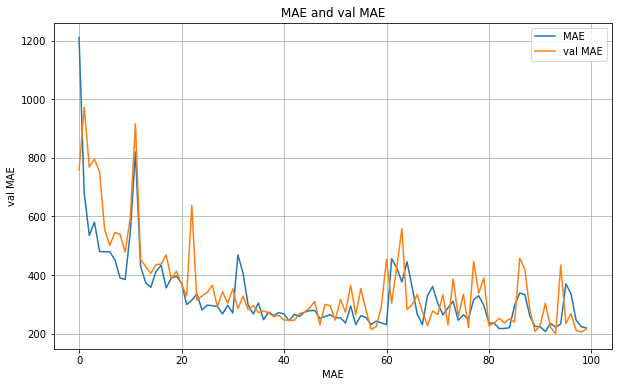

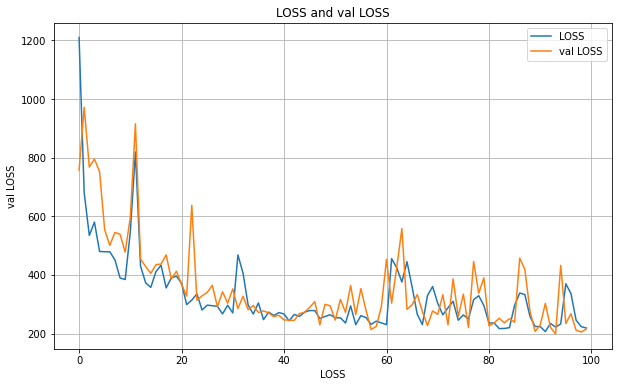

6/6 [==============================] - 0s 45ms/step


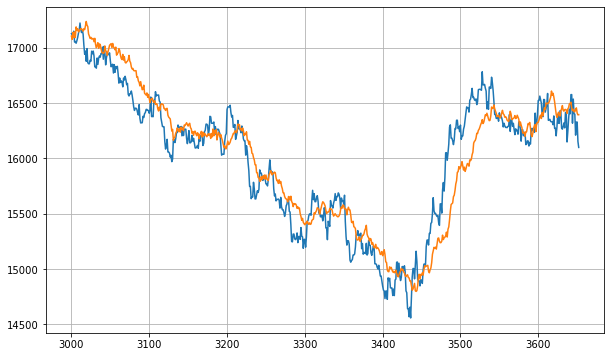

{'mae': 169.40816,
 'mse': 48641.95,
 'rmse': 220.5492,
 'mape': 1.0607066,
 'mase': 3.2734826}

In [72]:
# Load in best performing model
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(valid_set)

# Get mae and loss from history log
mae=history_4.history['mae']
val_mae=history_4.history['val_mae']
loss=history_4.history['loss']
val_loss=history_4.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_4 = model_forecast(model_4, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_4 = forecast_4.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_4))

eval_model_4 = evaluate_preds(y_true=x_valid,
                               y_pred=results_4)
eval_model_4

In [113]:
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(7)
], name="model_5")

# Get initial weights
init_weights = model_5.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_5.set_weights(init_weights)

model_5.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_5.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_5 = model_5.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_5.name)])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                11712     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
Total params: 13,175
Trainable params: 13,175
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     13/Unknown - 2s 63ms/step - loss: 15614.0449 - mae: 15614.5449

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 4s 107ms/step - loss: 13729.0869 - mae: 13729.5879 - val_loss: 9410.4336 - val_mae: 9410.9336
Epoch 2/100
13/21 [=================>............] - ETA: 0s - loss: 9134.2822 - mae: 9134.7822

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 117ms/step - loss: 8995.1875 - mae: 8995.6885 - val_loss: 8320.4023 - val_mae: 8320.9023
Epoch 3/100
13/21 [=================>............] - ETA: 0s - loss: 8005.0259 - mae: 8005.5259

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 130ms/step - loss: 7965.0859 - mae: 7965.5854 - val_loss: 7576.1675 - val_mae: 7576.6675
Epoch 4/100
13/21 [=================>............] - ETA: 0s - loss: 7147.3696 - mae: 7147.8691

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 96ms/step - loss: 7047.6235 - mae: 7048.1235 - val_loss: 6523.6147 - val_mae: 6524.1143
Epoch 5/100
13/21 [=================>............] - ETA: 0s - loss: 5911.1143 - mae: 5911.6138

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 98ms/step - loss: 5635.9702 - mae: 5636.4692 - val_loss: 4501.3447 - val_mae: 4501.8447
Epoch 6/100
14/21 [===================>..........] - ETA: 0s - loss: 3452.9292 - mae: 3453.4292

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 103ms/step - loss: 3165.4751 - mae: 3165.9751 - val_loss: 2353.7463 - val_mae: 2354.2461
Epoch 7/100
13/21 [=================>............] - ETA: 0s - loss: 1980.3361 - mae: 1980.8359

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 132ms/step - loss: 1839.3271 - mae: 1839.8271 - val_loss: 1408.8602 - val_mae: 1409.3602
Epoch 8/100
13/21 [=================>............] - ETA: 0s - loss: 1109.1903 - mae: 1109.6902

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 108ms/step - loss: 944.5578 - mae: 945.0576 - val_loss: 715.4427 - val_mae: 715.9427
Epoch 9/100
13/21 [=================>............] - ETA: 0s - loss: 602.0867 - mae: 602.5867

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 124ms/step - loss: 574.5070 - mae: 575.0070 - val_loss: 622.0803 - val_mae: 622.5803
Epoch 10/100
13/21 [=================>............] - ETA: 0s - loss: 539.6279 - mae: 540.1276

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 111ms/step - loss: 527.3183 - mae: 527.8181 - val_loss: 612.1271 - val_mae: 612.6269
Epoch 11/100
13/21 [=================>............] - ETA: 0s - loss: 568.4697 - mae: 568.9697

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 98ms/step - loss: 543.9935 - mae: 544.4934 - val_loss: 563.3464 - val_mae: 563.8464
Epoch 12/100
21/21 [==============================] - 2s 61ms/step - loss: 544.8157 - mae: 545.3156 - val_loss: 573.3447 - val_mae: 573.8445
Epoch 13/100
21/21 [==============================] - 2s 61ms/step - loss: 515.6824 - mae: 516.1821 - val_loss: 584.6351 - val_mae: 585.1346
Epoch 14/100
13/21 [=================>............] - ETA: 0s - loss: 549.8052 - mae: 550.3049

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 101ms/step - loss: 519.4499 - mae: 519.9497 - val_loss: 536.1342 - val_mae: 536.6340
Epoch 15/100
21/21 [==============================] - 2s 54ms/step - loss: 495.4082 - mae: 495.9081 - val_loss: 626.8923 - val_mae: 627.3923
Epoch 16/100
13/21 [=================>............] - ETA: 0s - loss: 493.1120 - mae: 493.6118

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 115ms/step - loss: 471.9009 - mae: 472.4007 - val_loss: 510.8539 - val_mae: 511.3539
Epoch 17/100
21/21 [==============================] - 2s 59ms/step - loss: 484.1555 - mae: 484.6553 - val_loss: 565.4040 - val_mae: 565.9037
Epoch 18/100
21/21 [==============================] - 2s 59ms/step - loss: 479.2438 - mae: 479.7436 - val_loss: 595.1860 - val_mae: 595.6859
Epoch 19/100
21/21 [==============================] - 2s 53ms/step - loss: 473.4511 - mae: 473.9510 - val_loss: 563.2757 - val_mae: 563.7756
Epoch 20/100
21/21 [==============================] - 2s 54ms/step - loss: 433.5587 - mae: 434.0584 - val_loss: 523.1506 - val_mae: 523.6506
Epoch 21/100
13/21 [=================>............] - ETA: 0s - loss: 456.2768 - mae: 456.7765

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 118ms/step - loss: 448.8985 - mae: 449.3982 - val_loss: 475.0175 - val_mae: 475.5175
Epoch 22/100
13/21 [=================>............] - ETA: 0s - loss: 472.9995 - mae: 473.4994

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 110ms/step - loss: 461.3299 - mae: 461.8297 - val_loss: 460.4385 - val_mae: 460.9385
Epoch 23/100
13/21 [=================>............] - ETA: 0s - loss: 474.3928 - mae: 474.8925

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 107ms/step - loss: 456.4425 - mae: 456.9422 - val_loss: 451.2996 - val_mae: 451.7996
Epoch 24/100
21/21 [==============================] - 2s 60ms/step - loss: 441.5976 - mae: 442.0973 - val_loss: 457.2527 - val_mae: 457.7527
Epoch 25/100
21/21 [==============================] - 2s 55ms/step - loss: 446.1749 - mae: 446.6746 - val_loss: 452.5536 - val_mae: 453.0535
Epoch 26/100
13/21 [=================>............] - ETA: 0s - loss: 466.2153 - mae: 466.7151

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 104ms/step - loss: 461.4010 - mae: 461.9009 - val_loss: 430.6539 - val_mae: 431.1538
Epoch 27/100
21/21 [==============================] - 2s 50ms/step - loss: 417.1858 - mae: 417.6855 - val_loss: 477.3450 - val_mae: 477.8449
Epoch 28/100
21/21 [==============================] - 2s 49ms/step - loss: 385.4430 - mae: 385.9426 - val_loss: 507.4934 - val_mae: 507.9930
Epoch 29/100
21/21 [==============================] - 1s 47ms/step - loss: 382.9824 - mae: 383.4822 - val_loss: 454.6518 - val_mae: 455.1516
Epoch 30/100
21/21 [==============================] - 1s 47ms/step - loss: 382.5430 - mae: 383.0426 - val_loss: 447.8390 - val_mae: 448.3389
Epoch 31/100
21/21 [==============================] - 1s 47ms/step - loss: 387.6710 - mae: 388.1706 - val_loss: 459.1808 - val_mae: 459.6804
Epoch 32/100
21/21 [==============================] - 2s 46ms/step - loss: 370.0359 - mae: 370.5356 - val_loss: 460.3062 - val_mae: 460.8059
Epoch 33/100
21/21 [=====

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 115ms/step - loss: 335.9109 - mae: 336.4105 - val_loss: 391.8229 - val_mae: 392.3226
Epoch 36/100
21/21 [==============================] - 2s 52ms/step - loss: 340.1532 - mae: 340.6528 - val_loss: 439.3736 - val_mae: 439.8730
Epoch 37/100
21/21 [==============================] - 2s 51ms/step - loss: 339.1866 - mae: 339.6863 - val_loss: 410.2095 - val_mae: 410.7093
Epoch 38/100
13/21 [=================>............] - ETA: 0s - loss: 329.8245 - mae: 330.3244

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 90ms/step - loss: 332.5607 - mae: 333.0605 - val_loss: 371.4877 - val_mae: 371.9877
Epoch 39/100
21/21 [==============================] - 1s 44ms/step - loss: 334.4458 - mae: 334.9454 - val_loss: 403.9746 - val_mae: 404.4740
Epoch 40/100
13/21 [=================>............] - ETA: 0s - loss: 334.7731 - mae: 335.2727

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 95ms/step - loss: 327.2130 - mae: 327.7126 - val_loss: 347.8410 - val_mae: 348.3405
Epoch 41/100
21/21 [==============================] - 1s 44ms/step - loss: 345.6581 - mae: 346.1577 - val_loss: 525.7618 - val_mae: 526.2617
Epoch 42/100
21/21 [==============================] - 1s 45ms/step - loss: 345.4845 - mae: 345.9842 - val_loss: 362.9984 - val_mae: 363.4982
Epoch 43/100
13/21 [=================>............] - ETA: 0s - loss: 312.3242 - mae: 312.8239

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 91ms/step - loss: 317.2801 - mae: 317.7798 - val_loss: 345.7571 - val_mae: 346.2571
Epoch 44/100
21/21 [==============================] - 1s 45ms/step - loss: 339.3827 - mae: 339.8824 - val_loss: 380.2334 - val_mae: 380.7328
Epoch 45/100
13/21 [=================>............] - ETA: 0s - loss: 305.4307 - mae: 305.9302

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 91ms/step - loss: 300.3838 - mae: 300.8831 - val_loss: 322.4445 - val_mae: 322.9442
Epoch 46/100
21/21 [==============================] - 1s 44ms/step - loss: 306.9346 - mae: 307.4343 - val_loss: 348.1735 - val_mae: 348.6732
Epoch 47/100
21/21 [==============================] - 1s 43ms/step - loss: 305.0293 - mae: 305.5288 - val_loss: 459.1387 - val_mae: 459.6387
Epoch 48/100
21/21 [==============================] - 1s 45ms/step - loss: 322.4462 - mae: 322.9458 - val_loss: 373.3286 - val_mae: 373.8285
Epoch 49/100
13/21 [=================>............] - ETA: 0s - loss: 305.6873 - mae: 306.1870

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 89ms/step - loss: 299.2339 - mae: 299.7336 - val_loss: 312.0199 - val_mae: 312.5197
Epoch 50/100
21/21 [==============================] - 1s 49ms/step - loss: 328.7785 - mae: 329.2782 - val_loss: 398.8681 - val_mae: 399.3674
Epoch 51/100
21/21 [==============================] - 2s 51ms/step - loss: 323.0119 - mae: 323.5115 - val_loss: 347.6049 - val_mae: 348.1046
Epoch 52/100
21/21 [==============================] - 2s 57ms/step - loss: 292.2031 - mae: 292.7028 - val_loss: 334.4970 - val_mae: 334.9967
Epoch 53/100
21/21 [==============================] - 2s 55ms/step - loss: 314.0616 - mae: 314.5612 - val_loss: 335.0175 - val_mae: 335.5172
Epoch 54/100
13/21 [=================>............] - ETA: 0s - loss: 283.4301 - mae: 283.9298

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 95ms/step - loss: 281.1280 - mae: 281.6277 - val_loss: 297.3021 - val_mae: 297.8012
Epoch 55/100
21/21 [==============================] - 2s 53ms/step - loss: 291.1839 - mae: 291.6835 - val_loss: 300.2736 - val_mae: 300.7733
Epoch 56/100
21/21 [==============================] - 2s 49ms/step - loss: 283.6312 - mae: 284.1309 - val_loss: 341.7478 - val_mae: 342.2476
Epoch 57/100
21/21 [==============================] - 2s 61ms/step - loss: 335.1812 - mae: 335.6809 - val_loss: 359.1508 - val_mae: 359.6508
Epoch 58/100
21/21 [==============================] - 2s 52ms/step - loss: 308.9185 - mae: 309.4180 - val_loss: 320.3650 - val_mae: 320.8649
Epoch 59/100
21/21 [==============================] - 1s 49ms/step - loss: 273.0801 - mae: 273.5795 - val_loss: 304.4242 - val_mae: 304.9240
Epoch 60/100
13/21 [=================>............] - ETA: 0s - loss: 284.9638 - mae: 285.4633

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 135ms/step - loss: 278.8152 - mae: 279.3147 - val_loss: 282.3835 - val_mae: 282.8835
Epoch 61/100
14/21 [===================>..........] - ETA: 0s - loss: 277.6563 - mae: 278.1560

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 91ms/step - loss: 268.3379 - mae: 268.8374 - val_loss: 281.5575 - val_mae: 282.0571
Epoch 62/100
21/21 [==============================] - 1s 48ms/step - loss: 274.2423 - mae: 274.7419 - val_loss: 368.5421 - val_mae: 369.0419
Epoch 63/100
21/21 [==============================] - 2s 56ms/step - loss: 277.6889 - mae: 278.1883 - val_loss: 291.3648 - val_mae: 291.8640
Epoch 64/100
21/21 [==============================] - 2s 46ms/step - loss: 290.2633 - mae: 290.7629 - val_loss: 282.0611 - val_mae: 282.5608
Epoch 65/100
13/21 [=================>............] - ETA: 0s - loss: 271.9520 - mae: 272.4515

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 3s 120ms/step - loss: 267.9647 - mae: 268.4642 - val_loss: 275.2525 - val_mae: 275.7515
Epoch 66/100
21/21 [==============================] - 1s 48ms/step - loss: 265.0700 - mae: 265.5695 - val_loss: 284.2474 - val_mae: 284.7467
Epoch 67/100
13/21 [=================>............] - ETA: 0s - loss: 272.9893 - mae: 273.4890

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 94ms/step - loss: 266.9471 - mae: 267.4468 - val_loss: 267.0655 - val_mae: 267.5650
Epoch 68/100
21/21 [==============================] - 2s 50ms/step - loss: 265.2148 - mae: 265.7143 - val_loss: 287.6278 - val_mae: 288.1277
Epoch 69/100
21/21 [==============================] - 1s 47ms/step - loss: 324.8249 - mae: 325.3243 - val_loss: 377.3459 - val_mae: 377.8453
Epoch 70/100
21/21 [==============================] - 1s 49ms/step - loss: 311.3506 - mae: 311.8501 - val_loss: 288.8467 - val_mae: 289.3456
Epoch 71/100
21/21 [==============================] - 1s 46ms/step - loss: 292.6261 - mae: 293.1257 - val_loss: 367.8859 - val_mae: 368.3859
Epoch 72/100
21/21 [==============================] - 1s 46ms/step - loss: 275.6736 - mae: 276.1732 - val_loss: 357.3578 - val_mae: 357.8571
Epoch 73/100
21/21 [==============================] - 1s 46ms/step - loss: 295.2312 - mae: 295.7307 - val_loss: 296.9376 - val_mae: 297.4372
Epoch 74/100
21/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 91ms/step - loss: 260.8961 - mae: 261.3957 - val_loss: 257.7056 - val_mae: 258.2054
Epoch 79/100
21/21 [==============================] - 1s 49ms/step - loss: 258.4799 - mae: 258.9793 - val_loss: 282.5814 - val_mae: 283.0811
Epoch 80/100
21/21 [==============================] - 1s 48ms/step - loss: 245.5302 - mae: 246.0298 - val_loss: 268.3283 - val_mae: 268.8279
Epoch 81/100
21/21 [==============================] - 2s 47ms/step - loss: 253.9355 - mae: 254.4349 - val_loss: 259.4911 - val_mae: 259.9901
Epoch 82/100
21/21 [==============================] - 1s 47ms/step - loss: 249.4171 - mae: 249.9166 - val_loss: 258.4464 - val_mae: 258.9459
Epoch 83/100
21/21 [==============================] - 1s 47ms/step - loss: 261.2194 - mae: 261.7190 - val_loss: 316.4702 - val_mae: 316.9698
Epoch 84/100
21/21 [==============================] - 1s 47ms/step - loss: 257.2914 - mae: 257.7910 - val_loss: 311.5978 - val_mae: 312.0977
Epoch 85/100
13/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 89ms/step - loss: 253.4144 - mae: 253.9139 - val_loss: 253.1308 - val_mae: 253.6306
Epoch 86/100
21/21 [==============================] - 1s 46ms/step - loss: 274.2592 - mae: 274.7588 - val_loss: 358.3926 - val_mae: 358.8922
Epoch 87/100
13/21 [=================>............] - ETA: 0s - loss: 289.8352 - mae: 290.3349

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 91ms/step - loss: 268.3588 - mae: 268.8584 - val_loss: 246.4476 - val_mae: 246.9474
Epoch 88/100
21/21 [==============================] - 1s 47ms/step - loss: 245.4329 - mae: 245.9324 - val_loss: 288.6851 - val_mae: 289.1844
Epoch 89/100
21/21 [==============================] - 1s 43ms/step - loss: 251.4751 - mae: 251.9746 - val_loss: 257.6263 - val_mae: 258.1262
Epoch 90/100
21/21 [==============================] - 1s 46ms/step - loss: 259.9337 - mae: 260.4332 - val_loss: 294.6216 - val_mae: 295.1216
Epoch 91/100
21/21 [==============================] - 1s 46ms/step - loss: 246.8186 - mae: 247.3182 - val_loss: 247.7450 - val_mae: 248.2449
Epoch 92/100
21/21 [==============================] - 1s 45ms/step - loss: 241.6604 - mae: 242.1599 - val_loss: 249.5670 - val_mae: 250.0667
Epoch 93/100
21/21 [==============================] - 1s 46ms/step - loss: 250.9696 - mae: 251.4693 - val_loss: 315.6628 - val_mae: 316.1627
Epoch 94/100
15/21 [======

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 90ms/step - loss: 268.9290 - mae: 269.4287 - val_loss: 236.3614 - val_mae: 236.8611
Epoch 95/100
21/21 [==============================] - 1s 45ms/step - loss: 279.6619 - mae: 280.1616 - val_loss: 251.8224 - val_mae: 252.3222
Epoch 96/100
13/21 [=================>............] - ETA: 0s - loss: 259.5682 - mae: 260.0678

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 91ms/step - loss: 254.4343 - mae: 254.9339 - val_loss: 234.5409 - val_mae: 235.0404
Epoch 97/100
13/21 [=================>............] - ETA: 0s - loss: 228.0168 - mae: 228.5164

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


21/21 [==============================] - 2s 90ms/step - loss: 228.3538 - mae: 228.8533 - val_loss: 233.4056 - val_mae: 233.9046
Epoch 98/100
21/21 [==============================] - 1s 46ms/step - loss: 223.0166 - mae: 223.5161 - val_loss: 239.7121 - val_mae: 240.2116
Epoch 99/100
21/21 [==============================] - 1s 46ms/step - loss: 226.5229 - mae: 227.0224 - val_loss: 240.2028 - val_mae: 240.7025
Epoch 100/100
21/21 [==============================] - 1s 47ms/step - loss: 233.4331 - mae: 233.9327 - val_loss: 339.5703 - val_mae: 340.0698


3/3 [==============================] - 0s 21ms/step - loss: 233.4056 - mae: 233.9046


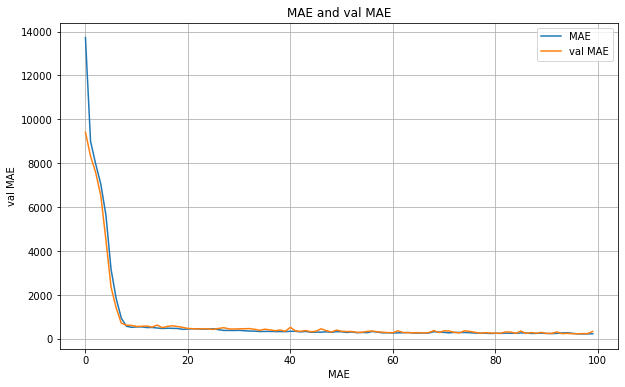

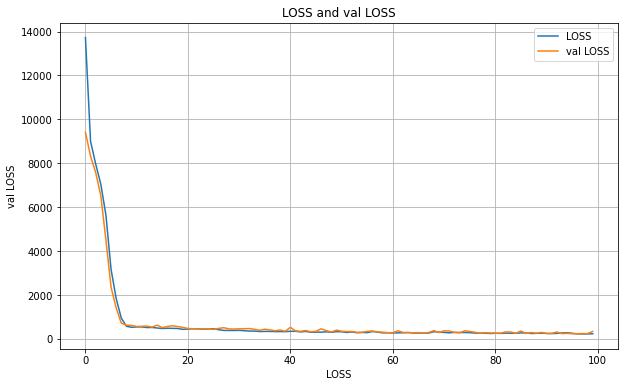

6/6 [==============================] - 0s 53ms/step


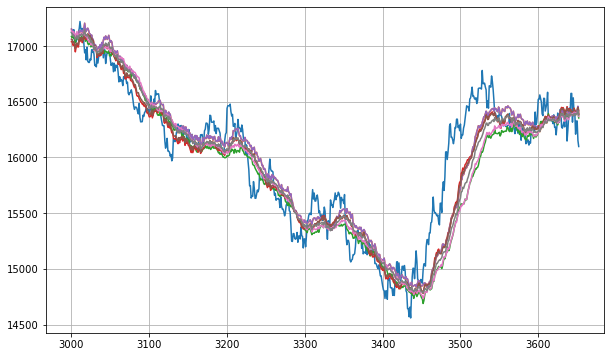

{'mae': 180.26555,
 'mse': 63592.05,
 'rmse': 186.40636,
 'mape': 1.1277225,
 'mase': 3.483281}

In [114]:
# Load in best performing model
model_5 = tf.keras.models.load_model("model_experiments/model_5/")
model_5.evaluate(valid_set)

# Get mae and loss from history log
mae=history_5.history['mae']
val_mae=history_5.history['val_mae']
loss=history_5.history['loss']
val_loss=history_5.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_5 = model_forecast(model_5, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_5 = forecast_5.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_5))

# Reshape the array to the desired format
repeated_arr = np.repeat(x_valid, 7)
x_valid_h = repeated_arr.reshape((653, 7)).astype(np.float32)

eval_model_5 = evaluate_predss(y_true=x_valid_h,
                               y_pred=results_5)
eval_model_5

In [137]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                            strides=1,
                            activation="relu",
                            padding='causal',
                            input_shape=[window_size, 1]),
    tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer
    tf.keras.layers.Dense(1)
], name="model_6")

# Get initial weights
init_weights = model_6.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_6.set_weights(init_weights)

model_6.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_6.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_6 = model_6.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_6.name)])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 365, 64)           256       
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     20/Unknown - 3s 75ms/step - loss: 11000.8770 - mae: 11001.3770

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 4s 127ms/step - loss: 10923.1230 - mae: 10923.6230 - val_loss: 7760.2222 - val_mae: 7760.7222
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 5126.3906 - mae: 5126.8906

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 118ms/step - loss: 5043.2324 - mae: 5043.7324 - val_loss: 1746.0460 - val_mae: 1746.5460
Epoch 3/100
20/21 [===========================>..] - ETA: 0s - loss: 912.8834 - mae: 913.3834

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 110ms/step - loss: 908.4023 - mae: 908.9023 - val_loss: 719.5671 - val_mae: 720.0671
Epoch 4/100
21/21 [==============================] - 2s 77ms/step - loss: 766.4826 - mae: 766.9822 - val_loss: 769.6957 - val_mae: 770.1957
Epoch 5/100
21/21 [==============================] - 2s 75ms/step - loss: 683.9982 - mae: 684.4982 - val_loss: 754.1542 - val_mae: 754.6542
Epoch 6/100
21/21 [==============================] - 2s 76ms/step - loss: 676.9158 - mae: 677.4158 - val_loss: 736.8033 - val_mae: 737.3033
Epoch 7/100
21/21 [==============================] - 2s 75ms/step - loss: 681.1252 - mae: 681.6252 - val_loss: 746.9164 - val_mae: 747.4164
Epoch 8/100
21/21 [==============================] - 2s 84ms/step - loss: 677.3731 - mae: 677.8730 - val_loss: 725.1922 - val_mae: 725.6922
Epoch 9/100
21/21 [==============================] - 2s 84ms/step - loss: 686.7900 - mae: 687.2898 - val_loss: 739.7596 - val_mae: 740.2596
Epoch 10/100
21/21 [===========

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 125ms/step - loss: 674.1597 - mae: 674.6597 - val_loss: 712.0104 - val_mae: 712.5101
Epoch 13/100
21/21 [==============================] - 2s 76ms/step - loss: 686.3906 - mae: 686.8906 - val_loss: 715.0700 - val_mae: 715.5700
Epoch 14/100
21/21 [==============================] - 2s 80ms/step - loss: 681.8898 - mae: 682.3896 - val_loss: 734.1396 - val_mae: 734.6396
Epoch 15/100
20/21 [===========================>..] - ETA: 0s - loss: 665.5696 - mae: 666.0696

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 129ms/step - loss: 664.3800 - mae: 664.8800 - val_loss: 708.6038 - val_mae: 709.1038
Epoch 16/100
21/21 [==============================] - 2s 77ms/step - loss: 678.6781 - mae: 679.1779 - val_loss: 714.7057 - val_mae: 715.2057
Epoch 17/100
21/21 [==============================] - 2s 92ms/step - loss: 681.3177 - mae: 681.8177 - val_loss: 712.4026 - val_mae: 712.9026
Epoch 18/100
21/21 [==============================] - 2s 91ms/step - loss: 665.8732 - mae: 666.3732 - val_loss: 724.1119 - val_mae: 724.6119
Epoch 19/100
21/21 [==============================] - 3s 96ms/step - loss: 659.5331 - mae: 660.0329 - val_loss: 714.7004 - val_mae: 715.2004
Epoch 20/100
20/21 [===========================>..] - ETA: 0s - loss: 664.6229 - mae: 665.1229

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 136ms/step - loss: 662.1031 - mae: 662.6030 - val_loss: 686.5118 - val_mae: 687.0118
Epoch 21/100
21/21 [==============================] - 2s 82ms/step - loss: 679.6107 - mae: 680.1107 - val_loss: 722.4866 - val_mae: 722.9866
Epoch 22/100
21/21 [==============================] - 2s 78ms/step - loss: 649.6292 - mae: 650.1292 - val_loss: 698.9058 - val_mae: 699.4058
Epoch 23/100
21/21 [==============================] - 2s 78ms/step - loss: 659.3510 - mae: 659.8506 - val_loss: 707.5929 - val_mae: 708.0929
Epoch 24/100
21/21 [==============================] - 2s 82ms/step - loss: 652.6597 - mae: 653.1597 - val_loss: 695.6960 - val_mae: 696.1960
Epoch 25/100
20/21 [===========================>..] - ETA: 0s - loss: 662.9237 - mae: 663.4233

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 119ms/step - loss: 661.3327 - mae: 661.8323 - val_loss: 674.9816 - val_mae: 675.4816
Epoch 26/100
21/21 [==============================] - 2s 79ms/step - loss: 672.8530 - mae: 673.3530 - val_loss: 683.7401 - val_mae: 684.2401
Epoch 27/100
21/21 [==============================] - 2s 81ms/step - loss: 661.7126 - mae: 662.2125 - val_loss: 694.4690 - val_mae: 694.9690
Epoch 28/100
21/21 [==============================] - 2s 81ms/step - loss: 652.0818 - mae: 652.5817 - val_loss: 685.8967 - val_mae: 686.3967
Epoch 29/100
21/21 [==============================] - 2s 77ms/step - loss: 656.6085 - mae: 657.1083 - val_loss: 678.7561 - val_mae: 679.2561
Epoch 30/100
21/21 [==============================] - 2s 88ms/step - loss: 654.9766 - mae: 655.4765 - val_loss: 684.5569 - val_mae: 685.0554
Epoch 31/100
21/21 [==============================] - 2s 88ms/step - loss: 648.1295 - mae: 648.6293 - val_loss: 687.1765 - val_mae: 687.6765
Epoch 32/100
20/21 [=====

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 111ms/step - loss: 642.9690 - mae: 643.4690 - val_loss: 654.8117 - val_mae: 655.3117
Epoch 33/100
21/21 [==============================] - 2s 76ms/step - loss: 665.7944 - mae: 666.2944 - val_loss: 667.1993 - val_mae: 667.6993
Epoch 34/100
21/21 [==============================] - 2s 79ms/step - loss: 645.8836 - mae: 646.3836 - val_loss: 669.5884 - val_mae: 670.0884
Epoch 35/100
21/21 [==============================] - 2s 76ms/step - loss: 645.0480 - mae: 645.5480 - val_loss: 698.2776 - val_mae: 698.7776
Epoch 36/100
21/21 [==============================] - 2s 76ms/step - loss: 635.5987 - mae: 636.0985 - val_loss: 668.8459 - val_mae: 669.3459
Epoch 37/100
21/21 [==============================] - 2s 75ms/step - loss: 636.0944 - mae: 636.5944 - val_loss: 665.6613 - val_mae: 666.1613
Epoch 38/100
21/21 [==============================] - 2s 75ms/step - loss: 642.6487 - mae: 643.1486 - val_loss: 668.8680 - val_mae: 669.3680
Epoch 39/100
21/21 [=====

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 109ms/step - loss: 638.3503 - mae: 638.8502 - val_loss: 640.7559 - val_mae: 641.2553
Epoch 42/100
21/21 [==============================] - 2s 75ms/step - loss: 643.4219 - mae: 643.9215 - val_loss: 650.2986 - val_mae: 650.7986
Epoch 43/100
21/21 [==============================] - 2s 75ms/step - loss: 634.5870 - mae: 635.0870 - val_loss: 669.5986 - val_mae: 670.0986
Epoch 44/100
21/21 [==============================] - 2s 75ms/step - loss: 623.6971 - mae: 624.1968 - val_loss: 663.2184 - val_mae: 663.7184
Epoch 45/100
21/21 [==============================] - 2s 75ms/step - loss: 626.2483 - mae: 626.7482 - val_loss: 671.2794 - val_mae: 671.7794
Epoch 46/100
21/21 [==============================] - 2s 75ms/step - loss: 617.8167 - mae: 618.3165 - val_loss: 667.2526 - val_mae: 667.7526
Epoch 47/100
21/21 [==============================] - 2s 75ms/step - loss: 627.6070 - mae: 628.1069 - val_loss: 655.7637 - val_mae: 656.2637
Epoch 48/100
21/21 [=====

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 109ms/step - loss: 621.2292 - mae: 621.7290 - val_loss: 629.0067 - val_mae: 629.5067
Epoch 56/100
21/21 [==============================] - 2s 74ms/step - loss: 637.0637 - mae: 637.5635 - val_loss: 649.2337 - val_mae: 649.7337
Epoch 57/100
21/21 [==============================] - 2s 76ms/step - loss: 614.4888 - mae: 614.9887 - val_loss: 653.3152 - val_mae: 653.8152
Epoch 58/100
21/21 [==============================] - 2s 76ms/step - loss: 613.5081 - mae: 614.0080 - val_loss: 640.2029 - val_mae: 640.7029
Epoch 59/100
21/21 [==============================] - 2s 77ms/step - loss: 616.7865 - mae: 617.2863 - val_loss: 635.9636 - val_mae: 636.4636
Epoch 60/100
21/21 [==============================] - 2s 76ms/step - loss: 618.8447 - mae: 619.3444 - val_loss: 656.6542 - val_mae: 657.1542
Epoch 61/100
21/21 [==============================] - 2s 75ms/step - loss: 600.9833 - mae: 601.4830 - val_loss: 630.0426 - val_mae: 630.5412
Epoch 62/100
21/21 [=====

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


21/21 [==============================] - 3s 111ms/step - loss: 585.8749 - mae: 586.3747 - val_loss: 627.4229 - val_mae: 627.9229
Epoch 96/100
21/21 [==============================] - 2s 75ms/step - loss: 600.4813 - mae: 600.9812 - val_loss: 640.6978 - val_mae: 641.1978
Epoch 97/100
21/21 [==============================] - 2s 75ms/step - loss: 587.4044 - mae: 587.9044 - val_loss: 655.0099 - val_mae: 655.5099
Epoch 98/100
21/21 [==============================] - 2s 77ms/step - loss: 579.4529 - mae: 579.9528 - val_loss: 653.2672 - val_mae: 653.7672
Epoch 99/100
21/21 [==============================] - 2s 77ms/step - loss: 580.3615 - mae: 580.8615 - val_loss: 641.2400 - val_mae: 641.7400
Epoch 100/100
21/21 [==============================] - 2s 77ms/step - loss: 581.0125 - mae: 581.5118 - val_loss: 647.3697 - val_mae: 647.8697


3/3 [==============================] - 0s 26ms/step - loss: 627.4228 - mae: 627.9228


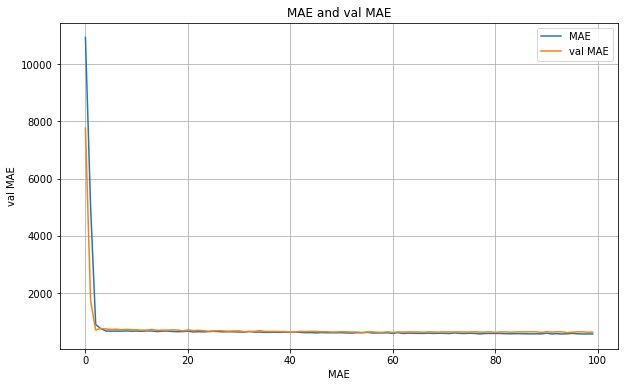

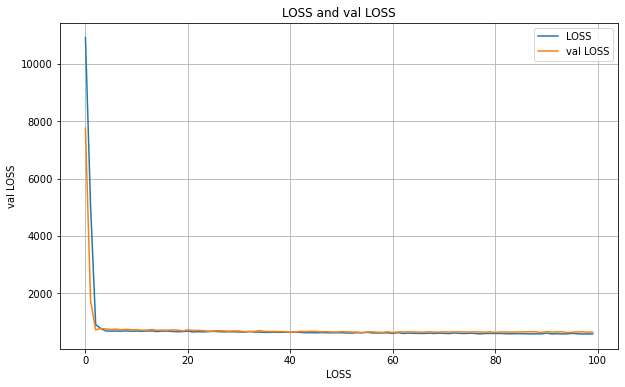

6/6 [==============================] - 0s 57ms/step


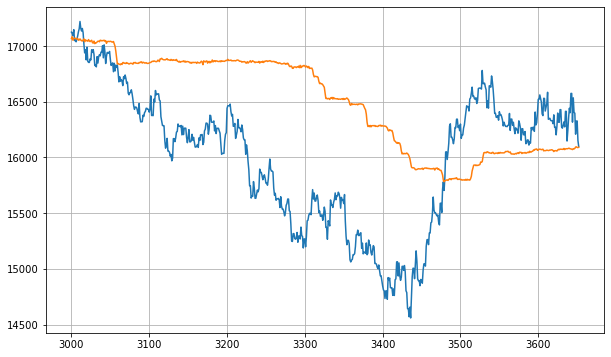

{'mae': 678.7971,
 'mse': 647719.4,
 'rmse': 804.8101,
 'mape': 4.33451,
 'mase': 13.116432}

In [138]:
# Load in best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6/")
model_6.evaluate(valid_set)

# Get mae and loss from history log
mae=history_6.history['mae']
val_mae=history_6.history['val_mae']
loss=history_6.history['loss']
val_loss=history_6.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_6 = model_forecast(model_6, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_6 = forecast_6.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_6))

eval_model_6 = evaluate_preds(y_true=x_valid,
                               y_pred=results_6)
eval_model_6

In [139]:
modeld_7 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=512, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer
  tf.keras.layers.Dense(1)
], name="modeld_7")

# Get initial weights
init_weights = modeld_7.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
modeld_7.set_weights(init_weights)

modeld_7.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
modeld_7.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_7 = modeld_7.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=modeld_7.name)])

Model: "modeld_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 365, 512)          2048      
                                                                 
 global_max_pooling1d (Globa  (None, 512)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     21/Unknown - 6s 225ms/step - loss: 7054.9033 - mae: 7055.4028

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 7s 287ms/step - loss: 7054.9033 - mae: 7055.4028 - val_loss: 2597.2561 - val_mae: 2597.7561
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1363.5410 - mae: 1364.0408

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 280ms/step - loss: 1363.5410 - mae: 1364.0408 - val_loss: 748.9333 - val_mae: 749.4333
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 832.2978 - mae: 832.7977

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 281ms/step - loss: 832.2978 - mae: 832.7977 - val_loss: 684.6756 - val_mae: 685.1756
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 735.1138 - mae: 735.6138

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 278ms/step - loss: 735.1138 - mae: 735.6138 - val_loss: 671.6917 - val_mae: 672.1917
Epoch 5/100
21/21 [==============================] - ETA: 0s - loss: 704.8736 - mae: 705.3736

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 280ms/step - loss: 704.8736 - mae: 705.3736 - val_loss: 668.7189 - val_mae: 669.2189
Epoch 6/100
21/21 [==============================] - ETA: 0s - loss: 682.7573 - mae: 683.2573

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 8s 347ms/step - loss: 682.7573 - mae: 683.2573 - val_loss: 665.6814 - val_mae: 666.1801
Epoch 7/100
21/21 [==============================] - 6s 268ms/step - loss: 693.3326 - mae: 693.8323 - val_loss: 692.9835 - val_mae: 693.4835
Epoch 8/100
21/21 [==============================] - 6s 263ms/step - loss: 672.8643 - mae: 673.3643 - val_loss: 714.7017 - val_mae: 715.2017
Epoch 9/100
21/21 [==============================] - 6s 269ms/step - loss: 657.7173 - mae: 658.2172 - val_loss: 693.1894 - val_mae: 693.6894
Epoch 10/100
21/21 [==============================] - 6s 249ms/step - loss: 651.9455 - mae: 652.4454 - val_loss: 676.2022 - val_mae: 676.7022
Epoch 11/100
21/21 [==============================] - 6s 246ms/step - loss: 649.3148 - mae: 649.8148 - val_loss: 676.6163 - val_mae: 677.1163
Epoch 12/100
21/21 [==============================] - 6s 249ms/step - loss: 647.4949 - mae: 647.9948 - val_loss: 707.2538 - val_mae: 707.7538
Epoch 13/100
21/21 [==

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 282ms/step - loss: 615.3810 - mae: 615.8809 - val_loss: 657.8242 - val_mae: 658.3242
Epoch 15/100
21/21 [==============================] - 6s 250ms/step - loss: 624.2682 - mae: 624.7681 - val_loss: 688.1232 - val_mae: 688.6232
Epoch 16/100
21/21 [==============================] - 6s 246ms/step - loss: 633.9169 - mae: 634.4167 - val_loss: 693.4479 - val_mae: 693.9479
Epoch 17/100
21/21 [==============================] - 6s 247ms/step - loss: 607.5071 - mae: 608.0070 - val_loss: 708.3358 - val_mae: 708.8358
Epoch 18/100
21/21 [==============================] - 6s 246ms/step - loss: 598.3576 - mae: 598.8574 - val_loss: 693.7365 - val_mae: 694.2365
Epoch 19/100
21/21 [==============================] - ETA: 0s - loss: 612.4910 - mae: 612.9909

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 284ms/step - loss: 612.4910 - mae: 612.9909 - val_loss: 654.2391 - val_mae: 654.7391
Epoch 20/100
21/21 [==============================] - 6s 245ms/step - loss: 634.7021 - mae: 635.2019 - val_loss: 704.4828 - val_mae: 704.9828
Epoch 21/100
21/21 [==============================] - ETA: 0s - loss: 593.5616 - mae: 594.0611

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 284ms/step - loss: 593.5616 - mae: 594.0611 - val_loss: 653.2139 - val_mae: 653.7139
Epoch 22/100
21/21 [==============================] - ETA: 0s - loss: 616.1762 - mae: 616.6760

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 277ms/step - loss: 616.1762 - mae: 616.6760 - val_loss: 645.7029 - val_mae: 646.2029
Epoch 23/100
21/21 [==============================] - 6s 244ms/step - loss: 603.9620 - mae: 604.4615 - val_loss: 671.5461 - val_mae: 672.0461
Epoch 24/100
21/21 [==============================] - 6s 247ms/step - loss: 627.5472 - mae: 628.0471 - val_loss: 653.9785 - val_mae: 654.4785
Epoch 25/100
21/21 [==============================] - ETA: 0s - loss: 594.0037 - mae: 594.5037

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 281ms/step - loss: 594.0037 - mae: 594.5037 - val_loss: 639.8337 - val_mae: 640.3337
Epoch 26/100
21/21 [==============================] - 6s 244ms/step - loss: 592.7173 - mae: 593.2170 - val_loss: 711.9777 - val_mae: 712.4777
Epoch 27/100
21/21 [==============================] - 6s 251ms/step - loss: 599.1738 - mae: 599.6736 - val_loss: 651.2905 - val_mae: 651.7905
Epoch 28/100
21/21 [==============================] - 6s 247ms/step - loss: 598.3424 - mae: 598.8424 - val_loss: 655.4354 - val_mae: 655.9354
Epoch 29/100
21/21 [==============================] - 6s 246ms/step - loss: 595.0433 - mae: 595.5432 - val_loss: 714.9670 - val_mae: 715.4670
Epoch 30/100
21/21 [==============================] - 6s 246ms/step - loss: 562.3749 - mae: 562.8746 - val_loss: 647.5340 - val_mae: 648.0340
Epoch 31/100
21/21 [==============================] - ETA: 0s - loss: 621.7828 - mae: 622.2827

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


21/21 [==============================] - 6s 282ms/step - loss: 621.7828 - mae: 622.2827 - val_loss: 628.7102 - val_mae: 629.2102
Epoch 32/100
21/21 [==============================] - 6s 247ms/step - loss: 606.7703 - mae: 607.2701 - val_loss: 688.6367 - val_mae: 689.1367
Epoch 33/100
21/21 [==============================] - 6s 245ms/step - loss: 567.3298 - mae: 567.8297 - val_loss: 714.5175 - val_mae: 715.0175
Epoch 34/100
21/21 [==============================] - 6s 247ms/step - loss: 584.0829 - mae: 584.5826 - val_loss: 644.8204 - val_mae: 645.3204
Epoch 35/100
21/21 [==============================] - 6s 246ms/step - loss: 623.6626 - mae: 624.1624 - val_loss: 682.4262 - val_mae: 682.9262
Epoch 36/100
21/21 [==============================] - 6s 253ms/step - loss: 580.2200 - mae: 580.7198 - val_loss: 654.6914 - val_mae: 655.1914
Epoch 37/100
21/21 [==============================] - 6s 247ms/step - loss: 602.4134 - mae: 602.9133 - val_loss: 657.1040 - val_mae: 657.6040
Epoch 38/100
21/21 

Epoch 89/100
21/21 [==============================] - 6s 248ms/step - loss: 594.3074 - mae: 594.8074 - val_loss: 632.1055 - val_mae: 632.6055
Epoch 90/100
21/21 [==============================] - 6s 249ms/step - loss: 577.5641 - mae: 578.0638 - val_loss: 683.2899 - val_mae: 683.7899
Epoch 91/100
21/21 [==============================] - 6s 278ms/step - loss: 562.3508 - mae: 562.8507 - val_loss: 683.5293 - val_mae: 684.0293
Epoch 92/100
21/21 [==============================] - 6s 260ms/step - loss: 546.0804 - mae: 546.5804 - val_loss: 714.9115 - val_mae: 715.4115
Epoch 93/100
21/21 [==============================] - 6s 251ms/step - loss: 580.9321 - mae: 581.4319 - val_loss: 647.6357 - val_mae: 648.1357
Epoch 94/100
21/21 [==============================] - 6s 251ms/step - loss: 564.2625 - mae: 564.7622 - val_loss: 673.7449 - val_mae: 674.2449
Epoch 95/100
21/21 [==============================] - 6s 249ms/step - loss: 570.1732 - mae: 570.6728 - val_loss: 684.5618 - val_mae: 685.0618
Epoch 

3/3 [==============================] - 0s 66ms/step - loss: 628.7102 - mae: 629.2102


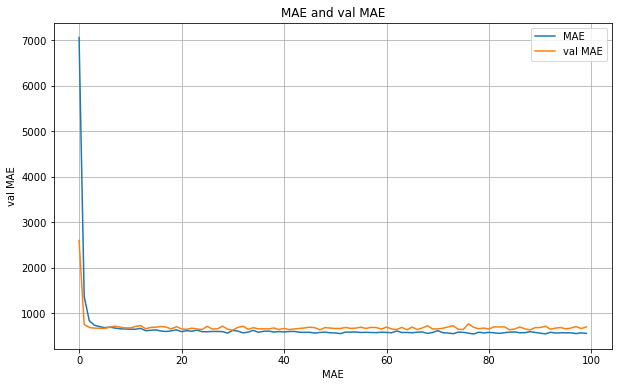

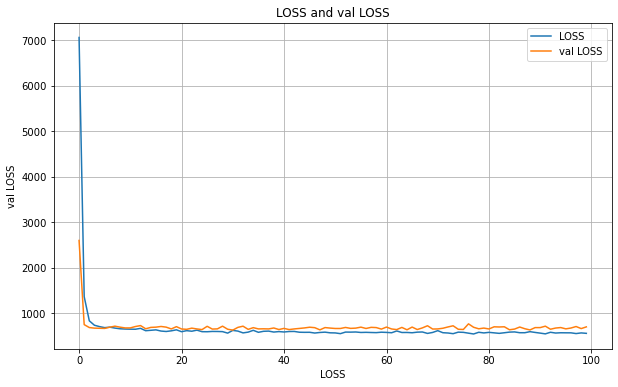

6/6 [==============================] - 1s 105ms/step


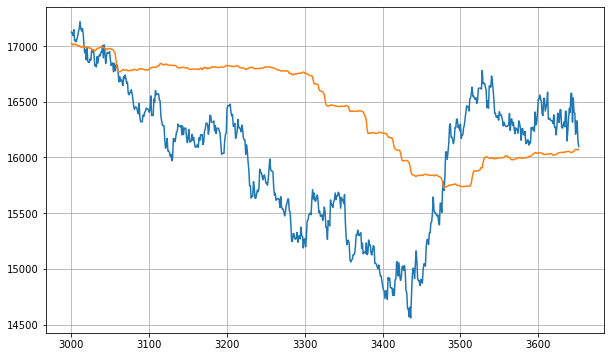

{'mae': 649.444,
 'mse': 589733.8,
 'rmse': 767.9413,
 'mape': 4.1454716,
 'mase': 12.549239}

In [142]:
# Load in best performing model
model_7 = tf.keras.models.load_model("model_experiments/modeld_7/")
model_7.evaluate(valid_set)

# Get mae and loss from history log
mae=history_7.history['mae']
val_mae=history_7.history['val_mae']
loss=history_7.history['loss']
val_loss=history_7.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_7 = model_forecast(model_7, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_7 = forecast_7.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_7))

eval_model_7 = evaluate_preds(y_true=x_valid,
                               y_pred=results_7)
eval_model_7

In [163]:
model_8 = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=[window_size, 1]),
  tf.keras.layers.Dense(1)
], name="model_8")

# Get initial weights
init_weights = model_8.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_8.set_weights(init_weights)

model_8.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_8.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_8 = model_8.fit(train_set,
                      epochs=20,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_8.name)])

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               8704      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
     21/Unknown - 14s 426ms/step - loss: 15770.9902 - mae: 15771.4902

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 33s 1s/step - loss: 15770.9902 - mae: 15771.4902 - val_loss: 15850.8076 - val_mae: 15851.3076
Epoch 2/20
21/21 [==============================] - ETA: 0s - loss: 15770.7598 - mae: 15771.2607

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 29s 1s/step - loss: 15770.7598 - mae: 15771.2607 - val_loss: 15850.5781 - val_mae: 15851.0781
Epoch 3/20
21/21 [==============================] - ETA: 0s - loss: 15770.5322 - mae: 15771.0312

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 31s 1s/step - loss: 15770.5322 - mae: 15771.0312 - val_loss: 15850.3477 - val_mae: 15850.8477
Epoch 4/20
21/21 [==============================] - ETA: 0s - loss: 15770.3027 - mae: 15770.8027

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 32s 2s/step - loss: 15770.3027 - mae: 15770.8027 - val_loss: 15850.1201 - val_mae: 15850.6201
Epoch 5/20
21/21 [==============================] - ETA: 0s - loss: 15770.0723 - mae: 15770.5732

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 31s 1s/step - loss: 15770.0723 - mae: 15770.5732 - val_loss: 15849.8926 - val_mae: 15850.3926
Epoch 6/20
21/21 [==============================] - ETA: 0s - loss: 15769.8457 - mae: 15770.3467

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 28s 1s/step - loss: 15769.8457 - mae: 15770.3467 - val_loss: 15849.6631 - val_mae: 15850.1631
Epoch 7/20
21/21 [==============================] - ETA: 0s - loss: 15769.6162 - mae: 15770.1162

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 34s 2s/step - loss: 15769.6162 - mae: 15770.1162 - val_loss: 15849.4355 - val_mae: 15849.9355
Epoch 8/20
21/21 [==============================] - ETA: 0s - loss: 15769.3887 - mae: 15769.8887

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 32s 2s/step - loss: 15769.3887 - mae: 15769.8887 - val_loss: 15849.2080 - val_mae: 15849.7080
Epoch 9/20
21/21 [==============================] - ETA: 0s - loss: 15769.1611 - mae: 15769.6621

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 30s 1s/step - loss: 15769.1611 - mae: 15769.6621 - val_loss: 15848.9805 - val_mae: 15849.4805
Epoch 10/20
21/21 [==============================] - ETA: 0s - loss: 15768.9355 - mae: 15769.4346

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 33s 2s/step - loss: 15768.9355 - mae: 15769.4346 - val_loss: 15848.7539 - val_mae: 15849.2539
Epoch 11/20
21/21 [==============================] - ETA: 0s - loss: 15768.7070 - mae: 15769.2070

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 32s 2s/step - loss: 15768.7070 - mae: 15769.2070 - val_loss: 15848.5264 - val_mae: 15849.0264
Epoch 12/20
21/21 [==============================] - ETA: 0s - loss: 15768.4785 - mae: 15768.9775

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 33s 2s/step - loss: 15768.4785 - mae: 15768.9775 - val_loss: 15848.2988 - val_mae: 15848.7988
Epoch 13/20
21/21 [==============================] - ETA: 0s - loss: 15768.2500 - mae: 15768.7510

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 34s 2s/step - loss: 15768.2500 - mae: 15768.7510 - val_loss: 15848.0732 - val_mae: 15848.5732
Epoch 14/20
21/21 [==============================] - ETA: 0s - loss: 15768.0254 - mae: 15768.5254

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 36s 2s/step - loss: 15768.0254 - mae: 15768.5254 - val_loss: 15847.8457 - val_mae: 15848.3457
Epoch 15/20
21/21 [==============================] - ETA: 0s - loss: 15767.7969 - mae: 15768.2979

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 35s 2s/step - loss: 15767.7969 - mae: 15768.2979 - val_loss: 15847.6162 - val_mae: 15848.1162
Epoch 16/20
21/21 [==============================] - ETA: 0s - loss: 15767.5703 - mae: 15768.0703

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 42s 2s/step - loss: 15767.5703 - mae: 15768.0703 - val_loss: 15847.3887 - val_mae: 15847.8887
Epoch 17/20
21/21 [==============================] - ETA: 0s - loss: 15767.3438 - mae: 15767.8447

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 36s 2s/step - loss: 15767.3438 - mae: 15767.8447 - val_loss: 15847.1631 - val_mae: 15847.6631
Epoch 18/20
21/21 [==============================] - ETA: 0s - loss: 15767.1152 - mae: 15767.6143

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 37s 2s/step - loss: 15767.1152 - mae: 15767.6143 - val_loss: 15846.9336 - val_mae: 15847.4336
Epoch 19/20
21/21 [==============================] - ETA: 0s - loss: 15766.8887 - mae: 15767.3887

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 38s 2s/step - loss: 15766.8887 - mae: 15767.3887 - val_loss: 15846.7080 - val_mae: 15847.2080
Epoch 20/20
21/21 [==============================] - ETA: 0s - loss: 15766.6611 - mae: 15767.1602

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


21/21 [==============================] - 59s 3s/step - loss: 15766.6611 - mae: 15767.1602 - val_loss: 15846.4805 - val_mae: 15846.9805


3/3 [==============================] - 13s 929ms/step - loss: 15846.4805 - mae: 15846.9805


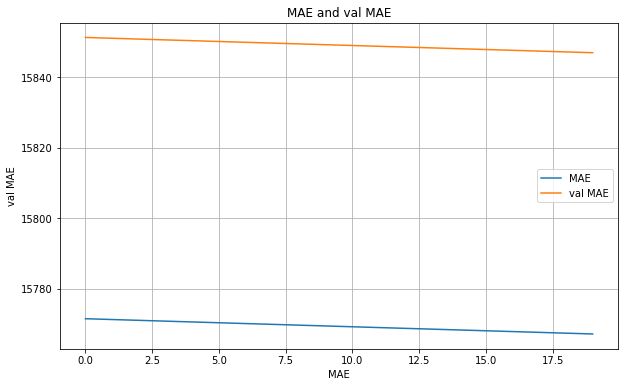

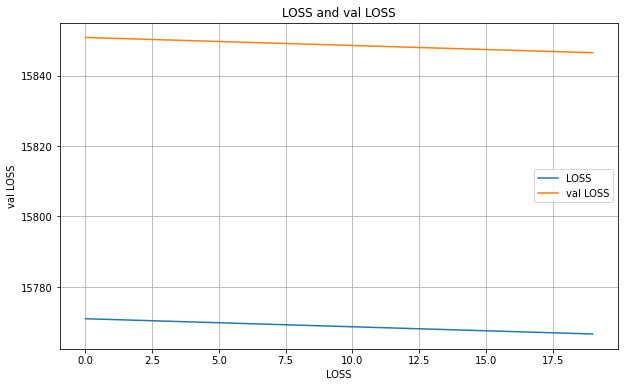

6/6 [==============================] - 8s 1s/step


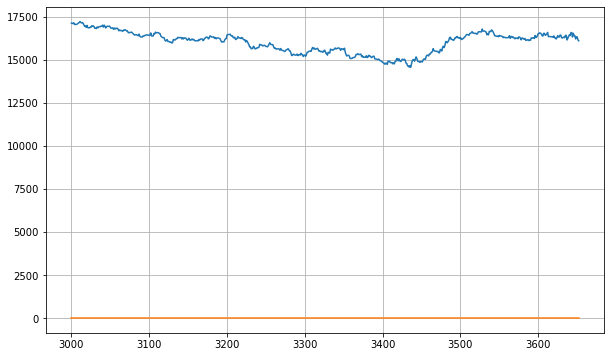

{'mae': 16001.645,
 'mse': 256425400.0,
 'rmse': 16013.288,
 'mape': 99.97402,
 'mase': 309.20062}

In [164]:
# Load in best performing model
model_8 = tf.keras.models.load_model("model_experiments/model_8/")
model_8.evaluate(valid_set)

# Get mae and loss from history log
mae=history_8.history['mae']
val_mae=history_8.history['val_mae']
loss=history_8.history['loss']
val_loss=history_8.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_8 = model_forecast(model_8, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_8 = forecast_8.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_8))

eval_model_8 = evaluate_predss(y_true=x_valid,
                               y_pred=results_8)
eval_model_8

In [229]:
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                            strides=1,
                            activation="relu",
                            padding='causal',
                            input_shape=[window_size, 1]),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_9")

# Get initial weights
init_weights = model_9.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_9.set_weights(init_weights)

model_9.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_9.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_9 = model_9.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_9.name)])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 365, 128)          512       
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                           

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 8s 266ms/step - loss: 14606.4990 - mae: 14606.9980 - val_loss: 12015.9434 - val_mae: 12016.4434
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 7762.3022 - mae: 7762.8018

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 232ms/step - loss: 7762.3022 - mae: 7762.8018 - val_loss: 799.2488 - val_mae: 799.7488
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1088.7627 - mae: 1089.2626

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 232ms/step - loss: 1088.7627 - mae: 1089.2626 - val_loss: 665.5847 - val_mae: 666.0837
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 746.2440 - mae: 746.7439

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 206ms/step - loss: 746.2440 - mae: 746.7439 - val_loss: 663.2762 - val_mae: 663.7745
Epoch 5/100
21/21 [==============================] - 4s 160ms/step - loss: 688.2610 - mae: 688.7609 - val_loss: 666.0973 - val_mae: 666.5973
Epoch 6/100
21/21 [==============================] - 4s 152ms/step - loss: 679.3874 - mae: 679.8872 - val_loss: 678.5261 - val_mae: 679.0261
Epoch 7/100
21/21 [==============================] - 3s 134ms/step - loss: 665.5759 - mae: 666.0758 - val_loss: 676.6224 - val_mae: 677.1224
Epoch 8/100
21/21 [==============================] - 3s 141ms/step - loss: 662.1932 - mae: 662.6931 - val_loss: 675.6384 - val_mae: 676.1384
Epoch 9/100
21/21 [==============================] - 3s 137ms/step - loss: 665.2723 - mae: 665.7723 - val_loss: 685.4710 - val_mae: 685.9710
Epoch 10/100
21/21 [==============================] - 4s 149ms/step - loss: 657.1255 - mae: 657.6254 - val_loss: 687.2857 - val_mae: 687.7857
Epoch 11/100
21/21 [====

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 199ms/step - loss: 626.8035 - mae: 627.3034 - val_loss: 660.3182 - val_mae: 660.8182
Epoch 18/100
21/21 [==============================] - 4s 145ms/step - loss: 648.9816 - mae: 649.4816 - val_loss: 741.2246 - val_mae: 741.7246
Epoch 19/100
21/21 [==============================] - 4s 146ms/step - loss: 633.3077 - mae: 633.8077 - val_loss: 676.8484 - val_mae: 677.3484
Epoch 20/100
21/21 [==============================] - 3s 138ms/step - loss: 616.1864 - mae: 616.6860 - val_loss: 666.0702 - val_mae: 666.5702
Epoch 21/100
21/21 [==============================] - 3s 134ms/step - loss: 633.7902 - mae: 634.2900 - val_loss: 706.9788 - val_mae: 707.4788
Epoch 22/100
21/21 [==============================] - 3s 132ms/step - loss: 615.1317 - mae: 615.6316 - val_loss: 675.0779 - val_mae: 675.5779
Epoch 23/100
21/21 [==============================] - 3s 133ms/step - loss: 629.8821 - mae: 630.3821 - val_loss: 703.2518 - val_mae: 703.7518
Epoch 24/100
21/21 

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 205ms/step - loss: 615.2195 - mae: 615.7195 - val_loss: 652.9774 - val_mae: 653.4774
Epoch 26/100
21/21 [==============================] - 3s 134ms/step - loss: 622.7944 - mae: 623.2942 - val_loss: 692.8073 - val_mae: 693.3073
Epoch 27/100
21/21 [==============================] - ETA: 0s - loss: 620.3513 - mae: 620.8511

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 195ms/step - loss: 620.3513 - mae: 620.8511 - val_loss: 647.0092 - val_mae: 647.5092
Epoch 28/100
21/21 [==============================] - 3s 134ms/step - loss: 619.9940 - mae: 620.4940 - val_loss: 696.6492 - val_mae: 697.1492
Epoch 29/100
21/21 [==============================] - 3s 133ms/step - loss: 606.3748 - mae: 606.8743 - val_loss: 705.6094 - val_mae: 706.1094
Epoch 30/100
21/21 [==============================] - 3s 134ms/step - loss: 606.5153 - mae: 607.0153 - val_loss: 670.0150 - val_mae: 670.5150
Epoch 31/100
21/21 [==============================] - 3s 131ms/step - loss: 608.1960 - mae: 608.6959 - val_loss: 682.3694 - val_mae: 682.8694
Epoch 32/100
21/21 [==============================] - 3s 133ms/step - loss: 617.8012 - mae: 618.3012 - val_loss: 684.3745 - val_mae: 684.8745
Epoch 33/100
21/21 [==============================] - 3s 131ms/step - loss: 591.4363 - mae: 591.9362 - val_loss: 717.7270 - val_mae: 718.2270
Epoch 34/100
21/21 

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 197ms/step - loss: 594.8904 - mae: 595.3904 - val_loss: 642.4657 - val_mae: 642.9657
Epoch 39/100
21/21 [==============================] - ETA: 0s - loss: 617.6902 - mae: 618.1900

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


21/21 [==============================] - 5s 194ms/step - loss: 617.6902 - mae: 618.1900 - val_loss: 637.8313 - val_mae: 638.3313
Epoch 40/100
21/21 [==============================] - 3s 133ms/step - loss: 611.0047 - mae: 611.5047 - val_loss: 695.5184 - val_mae: 696.0184
Epoch 41/100
21/21 [==============================] - 3s 134ms/step - loss: 580.4509 - mae: 580.9507 - val_loss: 691.1086 - val_mae: 691.6086
Epoch 42/100
21/21 [==============================] - 3s 133ms/step - loss: 601.6811 - mae: 602.1809 - val_loss: 674.8765 - val_mae: 675.3765
Epoch 43/100
21/21 [==============================] - 3s 131ms/step - loss: 587.1562 - mae: 587.6561 - val_loss: 676.7307 - val_mae: 677.2307
Epoch 44/100
21/21 [==============================] - 3s 133ms/step - loss: 607.3298 - mae: 607.8297 - val_loss: 692.6462 - val_mae: 693.1462
Epoch 45/100
21/21 [==============================] - 3s 132ms/step - loss: 600.0533 - mae: 600.5531 - val_loss: 682.6946 - val_mae: 683.1946
Epoch 46/100
21/21 

Epoch 97/100
21/21 [==============================] - 3s 132ms/step - loss: 570.2838 - mae: 570.7836 - val_loss: 705.7024 - val_mae: 706.2017
Epoch 98/100
21/21 [==============================] - 3s 133ms/step - loss: 582.7521 - mae: 583.2519 - val_loss: 659.5306 - val_mae: 660.0306
Epoch 99/100
21/21 [==============================] - 3s 132ms/step - loss: 585.1806 - mae: 585.6805 - val_loss: 698.3795 - val_mae: 698.8795
Epoch 100/100
21/21 [==============================] - 3s 135ms/step - loss: 557.9865 - mae: 558.4863 - val_loss: 727.9486 - val_mae: 728.4486


3/3 [==============================] - 1s 58ms/step - loss: 637.8314 - mae: 638.3314


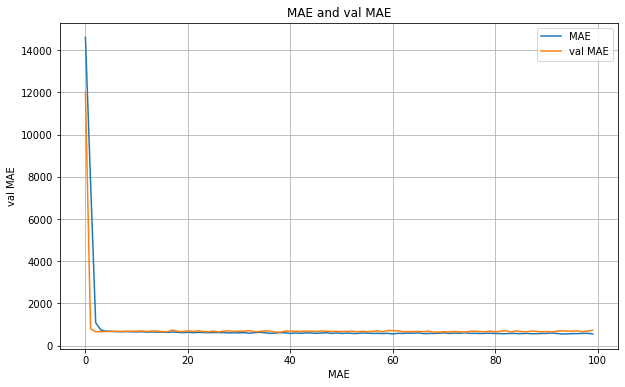

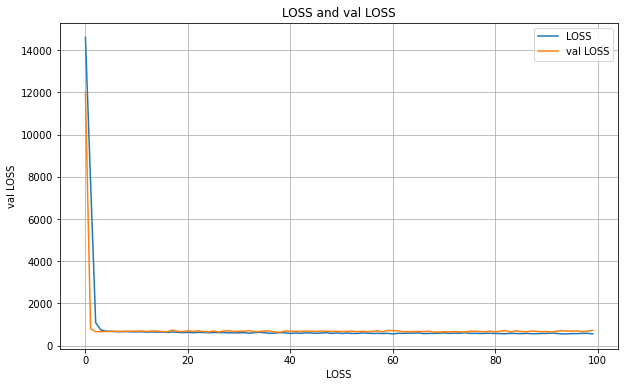

6/6 [==============================] - 1s 102ms/step


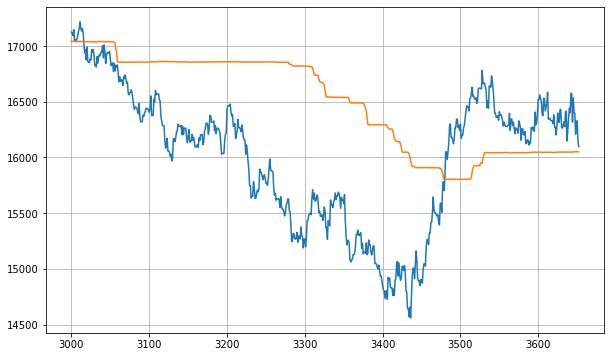

{'mae': 684.8951,
 'mse': 657458.06,
 'rmse': 810.8379,
 'mape': 4.3734603,
 'mase': 13.234263}

In [230]:
# Load in best performing model
model_9 = tf.keras.models.load_model("model_experiments/model_9/")
model_9.evaluate(valid_set)

# Get mae and loss from history log
mae=history_9.history['mae']
val_mae=history_9.history['val_mae']
loss=history_9.history['loss']
val_loss=history_9.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_9 = model_forecast(model_9, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_9 = forecast_9.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_9))

eval_model_9 = evaluate_predss(y_true=x_valid,
                               y_pred=results_9)
eval_model_9

In [231]:
import pandas as pd
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"model_1_dense30,10,1": eval_model_1,
                              "model_2_dense128,32,1": eval_model_2,
                              "model_3_dense10,1": eval_model_3,
                              "model_4_dense32,32,10,1": eval_model_4,
                              "model_5_dense32,32,10,7": eval_model_5,
                              "model_6_conv1D64_globalmaxpooling1D_dense1": eval_model_6,
                              "model_7_conv1D512_globalmaxpooling1D_dense1":eval_model_7,
                              "model_8_bidirectionalLSTM32_dense1": eval_model_8,
                              "model_9_conv1D128_globalmaxpooling1D_dense32,32,10,1": eval_model_9}).T
model_results

,mae,mse,rmse,mape,mase
"model_1_dense30,10,1",192.010101,5.463070e+04,233.732117,1.205271,3.710221
"model_2_dense128,32,1",187.533798,5.677236e+04,238.269501,1.173970,3.623725
"model_3_dense10,1",239.763641,8.869712e+04,297.820618,1.500304,4.632965
"model_4_dense32,32,10,1",169.408157,4.864195e+04,220.549194,1.060707,3.273483
"model_5_dense32,32,10,7",180.265549,6.359205e+04,186.406357,1.127723,3.483281
model_6_conv1D64_globalmaxpooling1D_dense1,678.797119,6.477194e+05,804.810120,4.334510,13.116432
model_7_conv1D512_globalmaxpooling1D_dense1,649.443970,5.897338e+05,767.941284,4.145472,12.549239
model_8_bidirectionalLSTM32_dense1,16001.644531,2.564254e+08,16013.288086,99.974022,309.200623
"model_9_conv1D128_globalmaxpooling1D_dense32,32,10,1",684.895081,6.574581e+05,810.837891,4.373460,13.234263


In [227]:
into_future = 365
future_forecast = make_future_forecast(values=series,
                                       model=model_4,
                                       into_future=into_future,
                                       window_size=window_size)

next_time_steps = np.arange(time[-1] + 1, time[-1] + 1 + into_future)
next_time_steps

# Insert last timestep/final price into next time steps and future forecasts so the plot connects
next_time_steps = np.insert(next_time_steps, 0, time[-1])
future_forecast = np.insert(future_forecast, 0, series[-1])


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 184ms/step


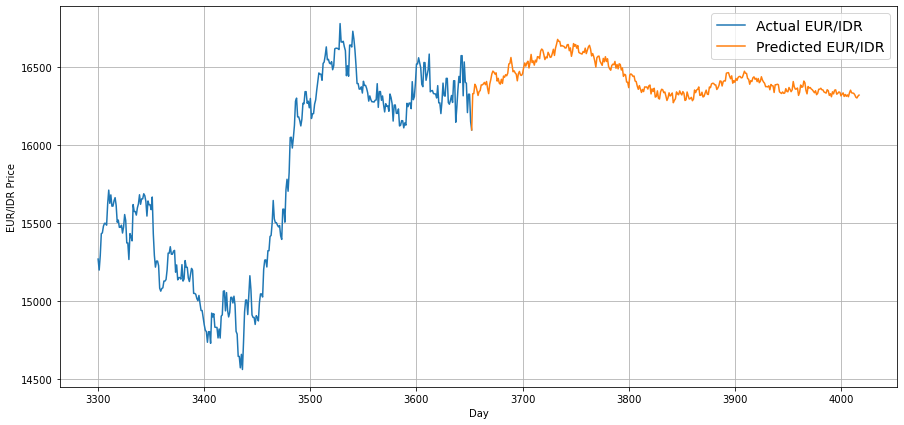

In [228]:
plt.figure(figsize=(15,7))
plot_time_series(time, series, start=3300, format="-", label="Actual EUR/IDR")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted EUR/IDR")